<a href="https://colab.research.google.com/github/YBilodeau/Metabolic-Syndrome-Prediction-Project/blob/main/Prediction_of_Metabolic_Syndrome_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Metabolic Syndrome Using Machine Learning**


- Yvon Bilodeau
- April 2022



---



### **Project Description**


#### **Goal**

The goal of this project is to predict the presence of metabolic syndrome, positive or negative, based on common risk factors utilizing categorical machine learning.

#### **Metabolic Syndrome Diagnosis**

The National Institutes of Health guidelines define metabolic syndrome as 
"a group of conditions that together raise your risk of coronary heart disease, diabetes, stroke, and other serious health problems. Metabolic syndrome is also called insulin resistance syndrome"

 - Source - [The National Institutes of Health](https://www.nhlbi.nih.gov/health/metabolic-syndrome#:~:text=Metabolic%20syndrome%20is%20a%20group,more%20of%20the%20following%20conditions.)

"The National Institutes of Health guidelines define metabolic syndrome as having three or more of the following traits, including traits for which you may be taking medication to control:

- **Large waist** — A waistline that measures at least 35 inches (89 centimeters) for women and 40 inches (102 centimeters) for men
- **High triglyceride level** — 150 milligrams per deciliter (mg/dL), or 1.7 millimoles per liter (mmol/L), or higher of this type of fat found in blood
- **Reduced "good" or HDL cholesterol** — Less than 40 mg/dL (1.04 mmol/L) in men or less than 50 mg/dL (1.3 mmol/L) in women of high-density lipoprotein (HDL) cholesterol
- **Increased blood pressure** — 130/85 millimeters of mercury (mm Hg) or higher
- **Elevated fasting blood sugar** — 100 mg/dL (5.6 mmol/L) or higher"

"Having just one of these conditions doesn't mean you have metabolic syndrome. But it does mean you have a greater risk of serious disease. And if you develop more of these conditions, your risk of complications, such as type 2 diabetes and heart disease, rises even higher.


Metabolic syndrome is increasingly common, and up to one-third of U.S. adults have it. If you have metabolic syndrome or any of its components, aggressive lifestyle changes can delay or even prevent the development of serious health problems."

 - Source - [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/metabolic-syndrome/symptoms-causes/syc-20351916?utm_source=Google&utm_medium=abstract&utm_content=Metabolic-syndrome&utm_campaign=Knowledge-panel)

#### **Source of data**



The dataset was aquired from [Data World](https://data.world/informatics-edu/metabolic-syndrome-prediction). They aquired the data for this analysis from the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm), National Health and Nutrition Examination initiative, in which several features were combined from multiple tables.



The dataset consists of 2401 rows, and 15 columns.The rows represent 2401 observations, and the columns represent 14 features and 1 target variable.

| Feature         | Description  |
| --------------  | ------------ | 
| seqn            | Respondent sequence number | 
| Age             | Age in Years | 
| Sex             | Male or Female | 
| Marital         | Marital status | 
| Income          | Income in Dollars | 
| Race            | Racial Group | 
| WaistCirc       | Waist Circumference (cm)| 
| BMI             | Body Mass Index (kg/m**2) | 
| Albuminuria     | Albumin in Urine (mg/L)) | 
| UrAlbCr         | Ratio of Albumin (mcg/L) to Creatinine (mg/L) in Urine | 
| UricAcid        | Uric Acid in Blood (mg/dl) | 
| BloodGlucose    | Glucose in Blood (mg/dL) | 
| HDL             | High Density Lipoprotein (mg/dl) | 
| Triglycerides   | Triglycerides in Blood (mg/dL) | 
| MetabolicSyndrome | Presence or not of at least three of the five metabolic risk factors | 



## **Mount Google Drive | Import Libraries | Load the Dataset**

### **Mount Google Drive**

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Libraries**

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import StrMethodFormatter
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Dummy Classifier
from sklearn.dummy import DummyClassifier
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
# Support Vector Classifier
from sklearn.svm import SVC
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# Metrics
from sklearn.metrics import *
#from sklearn import set_config
#set_config(display='diagram')

### **Load the Dataset**

- Data downloaded from [link](https://data.world/informatics-edu/metabolic-syndrome-prediction/file/Metabolic%20%20Syndrome.csv).

In [3]:
# Load the dataset
filename = "/content/drive/MyDrive/Colab Notebooks/CodingDojo/000 Data Files/Metabolic  Syndrome.csv"
df = pd.read_csv(filename)

## **Inspect the Data**

### Display the Row and Column Count

In [4]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 2401 rows, and 15 columns.
The rows represent 2401 observations, and the columns represent 14 features and 1 target variable.


### Display Data Types

In [5]:
# Display the column names and datatypes for each column
# Columns with mixed datatypes are identified as an object datatype
df.dtypes

seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome     object
dtype: object

### Display Column Names, Count of Non-Null Values, and Data Types

In [6]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


### Display First (10) Rows

In [7]:
# Display the first (10) rows of the dataframe
df.head(10)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn
5,62178,80,Male,Widowed,300.0,White,112.5,28.5,0,9.79,4.8,105,47,100,No MetSyn
6,62184,26,Male,Single,9000.0,Black,78.6,22.1,0,9.21,5.4,87,61,40,No MetSyn
7,62189,30,Female,Married,6200.0,Asian,80.2,22.4,0,8.78,6.7,83,48,91,No MetSyn
8,62191,70,Male,Divorced,1000.0,Black,NaN,NaN,1,45.67,5.4,96,35,75,No MetSyn
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,No MetSyn


- Data appears to have loaded correctly.

## **Clean the Data**

In [8]:
# Display the descriptive statistics for the numeric columns
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [9]:
# Display the descriptive statistics for the non-numeric columns
df.describe(exclude="number")

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2193,2401,2401
unique,2,5,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


### **Remove Unnecessary Columns**

#### **seqn column**

In [10]:
# Calculate the count of unique values and the cardinality for this column
unique_values = df.shape[0]
cardinality = (df['seqn'].value_counts().sum())/(df.shape[0])*100
# Display the count of unique values and the cardinality for this column
print(f'This column has {unique_values} unique values which is {cardinality}% cardinality.')

This column has 2401 unique values which is 100.0% cardinality.


- This column will not contribute to predictability and so may be removed.

In [11]:
# Drop the column
df.drop(columns = ['seqn'], inplace=True)

- Confirm column has been dropped.

In [12]:
# Display the first (5) rows of the dataframe
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


### **Remove Unecessary Rows**

In [13]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


- No duplicates were found or dropped.

### **Missing Values**

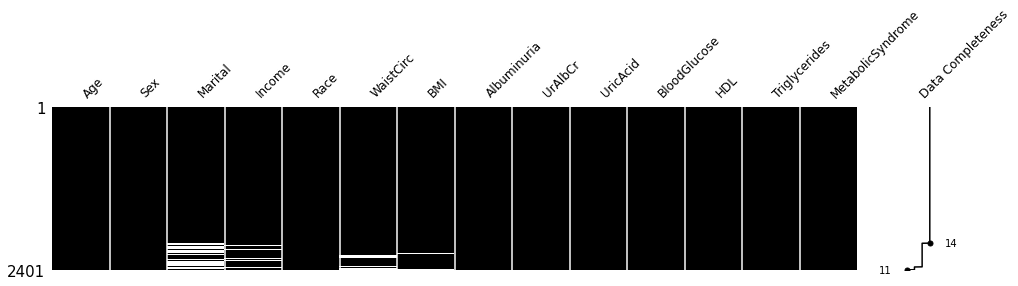

In [14]:
# Display missing values by column
msno.matrix(df, figsize=(16,3), labels=True, 
            fontsize=12, sort="descending", color=(0,0,0));

In [15]:
# Display the count of missing values by column
print(df.isna().sum())

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64


- 'Marital', 'Income', 'WaistCirc' and 'BMI' columns have missing values.

#### **Statistics Function**

In [16]:
# Create a function to display supplemental statistics
def column_statistics(column_name, max_unique_values_to_disply=20):
    # Display the count of missing values for this column
    print(f'Missing Values: {df[column_name].isna().sum()} ({round((df[column_name].isna().sum())/(df.shape[0])*100,1)})%')

    # Determine Outliers - Only if this is a numeric column
    if (df[column_name].dtype == 'int64') | (df[column_name].dtype == 'float64'):
        # Create outlier filters
        q1 = df[column_name].quantile(0.25) # 25th percentile
        q3 = df[column_name].quantile(0.75) # 75th percentile
        iqr = q3 - q1 # Interquartile range
        low_limit = q1 - (1.5 * iqr) # low limit
        high_limit = q3 + (1.5 * iqr) # high limit
        # Create outlier dataframes
        low_df = df[(df[column_name] < low_limit)]
        high_df = df[(df[column_name] > high_limit)]
        # Calculate the outlier counts and percentages
        low_oulier_count = low_df.shape[0]
        low_outlier_percentge = round(((low_oulier_count)/(df.shape[0])*100),1)
        high_oulier_count = high_df.shape[0]
        high_outlier_percentge = round(((high_oulier_count)/(df.shape[0])*100),1)
        # Display the outlier counts.
        print(f'Outliers: {low_oulier_count} ({low_outlier_percentge})% low, {high_oulier_count} ({high_outlier_percentge})% high')
        
    # Display the count of unique values for this column
    print(f'Unique values: {df[column_name].nunique()}')

    # Display the unique values including Nan and their counts for this column,
    # if the number of unique values is below the function parameter
    if df[column_name].nunique() < max_unique_values_to_disply:
        print(df[column_name].value_counts(dropna=False))

#### **Categorical Columns**

##### **Marital column**


In [17]:
# Display column statistics
column_statistics('Marital', 10)

Missing Values: 208 (8.7)%
Unique values: 5
Married      1192
Single        498
Divorced      242
NaN           208
Widowed       166
Separated      95
Name: Marital, dtype: int64


- **Missing Value Options and Considerations**
 - **Drop column**
   - con: This would result in a significant loss of data.
   - 8.7% missing values is not significant enough to justify this option.
 - **Drop rows with missing values**
   - con: This would result in a significant loss of data.
   - 8.7% missing rows is too significant to justify this option.
  - **Replace with constant value 'Unknown'**
   - pro: This will not introduce bias.
   - con: This will not factor correlations between features.  
   - con: This may not generate the highest prediction scores possible.
 - **Simple Imputation using strategy = 'most frequent' (mode)**
   - pro: This typically works well on categorical options.
   - con: This can introduce bias.
   - con: This will not factor correlations between features.   
 - **Advanced Imputation using SKLearn**
   - pro: This will factor correlations between features.
   - pro: This may have the potential to generate the highest prediction scores possible.
   - con: This can be memory or time intensive.
   - con: Correlation between this and the other features is unlikely based upon the features available in the dataset.

Replace with constant value 'Unknown' will be used for the initial strategy. However in others strategies should also be explored to see if prediction scores can be improved.

- Replacing missing values with the constant 'Unknown' will not cause data leakage and may be performed prior to Preprocessing.

In [18]:
# Fill NaN values with the constant value 'Unknown'
df.Marital.fillna('Unknown',inplace=True)

In [19]:
# Display the unique values for this column
print(df['Marital'].unique())

['Single' 'Married' 'Widowed' 'Divorced' 'Unknown' 'Separated']


- No missing values for this column is confirmed.

#### **Numeric Columns**

##### **Income column**

In [20]:
# Display column statistics
column_statistics('Income', 1)

Missing Values: 117 (4.9)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 14


- **Missing Value Options and Considerations**
 - **Drop column**
   - con: This would result in a significant loss of data.
   - 4.9% missing values is not significant enough to justify this option.
 - **Drop rows with missing values**
   - con: This would result in a significant loss of data.
   - 4.9% missing rows is too significant to justify this option.
 - **Simple Imputation using strategy = 'mean'**
   - pro: This typically works well small numeric datasets.
   - con: This can introduce bias and is affected by skew and outliers more than the 'median' value.
   - con: This will not factor correlations between features.   
 - **Simple Imputation using strategy = 'median'**
   - pro: This typically works well small numeric datasets.
   - pro: This is less affected by outliers than strategy = 'median'.
   - con: This will not factor correlations between features.     
 - **Advanced Imputation using SKLearn**
   - pro: This will factor correlations between features.
   - pro: This may have the potential to generate the highest prediction scores possible.
   - con: This can be memory and or time intensive..

Simple Imputation using strategy = 'median' will be used as the strategy for this project. This can introduce data leakage if applied prior to the Train Test Split and so will be handled in Preprocessing after the Train Test Split. However others strategies should also be explored to see if prediction scores can be improved.

##### **WaistCirc column**

In [21]:
# Display column statistics
column_statistics('WaistCirc')

Missing Values: 85 (3.5)%
Outliers: 0 (0.0)% low, 44 (1.8)% high
Unique values: 635


- **Missing Value Options and Considerations**
 - **Drop column**
   - con: This would result in a significant loss of data.
   - 1.8% missing values is not significant enough to justify this option.
 - **Drop rows with missing values**
   - con: This would result in a significant loss of data.
   - 1.8% missing rows is viable, but still too significant to justify this option.
 - **Simple Imputation using strategy = 'mean'**
   - pro: This typically works well small numeric datasets.
   - con: This can introduce bias and is affected by skew and outliers more than the 'median' value.
   - con: This will not factor correlations between features.   
 - **Simple Imputation using strategy = 'median'**
   - pro: This typically works well small numeric datasets.
   - pro: This is less affected by outliers than strategy = 'median'.
   - con: This will not factor correlations between features.     
 - **Advanced Imputation using SKLearn**
   - pro: This will factor correlations between features.
   - pro: This may have the potential to generate the highest prediction scores possible.
   - con: This can be memory and or time intensive.

Simple Imputation using strategy = 'median' will be used as the strategy for this project. This can introduce data leakage if applied prior to the Train Test Split and so will be handled in Preprocessing after the Train Test Split. However others strategies should also be explored to see if prediction scores can be improved.

##### **BMI column**

In [22]:
# Display column statistics
column_statistics('BMI')

Missing Values: 26 (1.1)%
Outliers: 0 (0.0)% low, 67 (2.8)% high
Unique values: 322


- **Missing Value Options and Considerations**
 - **Drop column**
   - con: This would result in a significant loss of data.
   - 2.8% missing values is not significant enough to justify this option.
 - **Drop rows with missing values**
   - con: This would result in a significant loss of data.
   - 2.8% missing rows is viable, but still too significant to justify this option.
 - **Simple Imputation using strategy = 'mean'**
   - pro: This typically works well small numeric datasets.
   - con: This can introduce bias and is affected by skew and outliers more than the 'median' value.
   - con: This will not factor correlations between features.   
 - **Simple Imputation using strategy = 'median'**
   - pro: This typically works well small numeric datasets.
   - pro: This is less affected by outliers than strategy = 'median'.
   - con: This will not factor correlations between features.     
 - **Advanced Imputation using SKLearn**
   - pro: This will factor correlations between features.
   - pro: This may have the potential to generate the highest prediction scores possible.
   - con: This can be memory and or time intensive.

Simple Imputation using strategy = 'median' will be used as the strategy for this project. This can introduce data leakage if applied prior to the Train Test Split and so will be handled in Preprocessing after the Train Test Split. However others strategies should also be explored to see if prediction scores can be improved.

### **Inspect Column Datatypes for Errors**

Ensure all columns match the data types listed in the data dictionary.

In [23]:
 # Display column names and datatypes
df.dtypes

Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome     object
dtype: object

In [24]:
# Display first (5) rows
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


- All columns match their datatypes.

### **Inspect Column Names for Errors**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.(example: cat, Cat, cats)

#### **Object Datatypes**

In [25]:
# Display the column names for the object datatypes
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Sex', 'Marital', 'Race', 'MetabolicSyndrome'], dtype='object')

- No issues noted.

#### **Numerical Datatypes**

In [26]:
# Display the column names for the numeric columns
dtypes = df.dtypes
num_cols = dtypes[(dtypes == "float64") | (dtypes == "int64")].index
num_cols

Index(['Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr',
       'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides'],
      dtype='object')

- No issues noted.

### **Inspect Column Values for Errors**

#### **Object Datatypes**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.

In [27]:
# Display the descriptive statistics for the non-numeric columns
df.describe(exclude="number")

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2401,2401,2401
unique,2,6,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


##### **Sex column**

In [28]:
# Display the unique values for this column
print(df['Sex'].unique())

['Male' 'Female']


In [29]:
# Display the unique values and their counts for this column
df['Sex'].value_counts()

Female    1211
Male      1190
Name: Sex, dtype: int64

- No issues noted.

##### **Marital column**

In [30]:
# Display the unique values for this column
print(df['Marital'].unique())

['Single' 'Married' 'Widowed' 'Divorced' 'Unknown' 'Separated']


In [31]:
# Display the unique values and their counts for this column
df['Marital'].value_counts()

Married      1192
Single        498
Divorced      242
Unknown       208
Widowed       166
Separated      95
Name: Marital, dtype: int64

- No issues noted.

##### **Race column**

In [32]:
# Display the unique values for this column
print(df['Race'].unique())

['White' 'Asian' 'Black' 'MexAmerican' 'Hispanic' 'Other']


In [33]:
# Display the unique values and their counts for this column
df['Race'].value_counts()

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64

- No issues noted.

##### **MetabolicSyndrome column**

In [34]:
# Display the unique values for this column
print(df['MetabolicSyndrome'].unique())

['No MetSyn' 'MetSyn']


In [35]:
# Display the unique values and their counts for this column
df['MetabolicSyndrome'].value_counts()

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64

- No issues noted.

#### **Numerical Datatypes**

In [36]:
# Display the descriptive statistics for the numeric columns
df.describe().round(2)

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.00,2284.00,2316.00,2375.00,2401.00,2401.00,2401.00,2401.00,2401.00,2401.00
mean,48.69,4005.25,98.31,28.70,0.15,43.63,5.49,108.25,53.37,128.13
std,17.63,2954.03,16.25,6.66,0.42,258.27,1.44,34.82,15.19,95.32
min,20.00,300.00,56.20,13.40,0.00,1.40,1.80,39.00,14.00,26.00
25%,34.00,1600.00,86.68,24.00,0.00,4.45,4.50,92.00,43.00,75.00
50%,48.00,2500.00,97.00,27.70,0.00,7.07,5.40,99.00,51.00,103.00
75%,63.00,6200.00,107.62,32.10,0.00,13.69,6.40,110.00,62.00,150.00
max,80.00,9000.00,176.00,68.70,2.00,5928.00,11.30,382.00,156.00,1562.00


- Albuminuria has 0.00 values for min, 25%, 50%, and 75%.

##### **Albuminuria Column**

In [37]:
# Display the unique values and their counts for this column
df['Albuminuria'].value_counts(ascending=False)

0    2089
1     254
2      58
Name: Albuminuria, dtype: int64

In [38]:
# Display the unique values and their count percentages for this column
df['Albuminuria'].value_counts(ascending=False, normalize = True)

0    0.870054
1    0.105789
2    0.024157
Name: Albuminuria, dtype: float64

- Albuminuria is an ordinal column with values of 0, 1, and 2.
- It has a significant percentage count of 0 values.
- The presence of Albumin in Urea is an indicator of kidney disease.

## **Exploratory Data Analysis**

#### **Functions**

##### **Function to Display Histogram**

In [39]:
# Create a function to create a Histogram
def hist_plot(column_name, unit_of_measure, bin_count):
    fig, ax = plt.subplots(nrows=1, figsize=(8,4), facecolor='w')
    plt.title(column_name, fontsize = 22, weight='bold')
    sns.histplot(data=df, x=column_name, color='#069AF3', 
                 linewidth=2, bins=bin_count); 
    plt.xlabel(unit_of_measure, fontsize = 16, weight='bold')
    plt.xticks(weight='bold')
    ax.set_ylabel('Instances',fontweight='bold',fontsize=14)
    ax.set_facecolor('lightblue')
    ax.tick_params(labelcolor='k', labelsize=10)
    ax.set_yticklabels(ax.get_yticks(), weight='bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)

##### **Function to Display Histogram and Boxplot**

In [40]:
# Create a function to create a Histogram and Boxplot in the same figure
def hist_box_plot(column_name, unit_of_measure, bin_count):
    fig, (ax1,ax2) = plt.subplots(nrows =2, sharex=True, figsize=(8, 6), 
                                  facecolor='w', 
                                  gridspec_kw={'height_ratios':[0.75, 0.25]})
    plt.suptitle(f'{column_name}', y=1.02, va='center', 
                 fontsize = 22, weight='bold')
    sns.histplot(data=df, x=column_name, color='#069AF3', linewidth=2, 
                 ax=ax1, bins=bin_count);
    plt.xlabel(unit_of_measure, fontsize = 16, weight='bold')
    plt.xticks(weight='bold')
    ax1.set_ylabel('Instances',fontweight='bold',fontsize=18)
    ax1.set_facecolor('lightblue')
    ax1.tick_params(labelcolor='k', labelsize=10)
    ax1.set_yticklabels(ax1.get_yticks(), weight='bold')
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(3)
    sns.boxplot(data=df, x=column_name, width=.5, color='#069AF3', ax=ax2,
                medianprops={'color':'k', 'linewidth':2},
                whiskerprops={'color':'k', 'linewidth':2},
                boxprops={'facecolor':'#069AF3', 
                          'edgecolor':'k', 'linewidth':2},
                capprops={'color':'k', 'linewidth':3}); 
    ax2.tick_params(labelcolor='k', labelsize=10)
    ax2.set(xlabel=unit_of_measure);
    ax2.set_xticklabels(ax2.get_xticks(), fontweight='bold')
    ax2.spines['bottom'].set_linewidth(2)
    ax2.spines['top'].set_color(None)
    ax2.spines['left'].set_color(None)
    ax2.spines['right'].set_color(None)
    plt.tight_layout();
    plt.show;

##### **Function to Display Countplot**

In [41]:
# Create a function to create a Count Plot
def count_plot(column_name, label_order):
    fig, ax = plt.subplots(nrows=1, figsize=(8,4), facecolor='w')
    plt.title(column_name, fontsize = 22, weight='bold')
    sns.countplot(data=df, x=column_name, lw=3, ec='k', 
                  color='#069AF3', order=label_order)
    plt.xlabel('')
    plt.xticks(weight='bold')
    ax.set_ylabel('Instances', fontweight='bold', fontsize=18)
    ax.set_facecolor('lightblue')
    ax.tick_params(labelcolor='k', labelsize=12)
    ax.set_yticklabels(ax.get_yticks(), weight='bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    plt.tight_layout()
    plt.show;

##### **Function to Display Scatter Plot**

In [42]:
# Create a function to create a Count Plot
# Sex and Age correlation to MetabolicSyndrome
def scatter_plot(x,y, x_uom='', y_uom=''):
    palette_dict = {'Negative': 'indigo' , 'Positive': 'magenta'}
    fig, ax = plt.subplots(figsize=(8,4), facecolor='w')
    sns.scatterplot(x=x, y=y, hue="MetabolicSyndrome", 
                    palette=palette_dict, data=df);
    plt.title(f'{x} and {y} \ncorrelation to Metabolic Syndrome', fontsize = 18, weight='bold')
    plt.xlabel(f'{x} {x_uom}', fontsize = 14, weight='bold')
    plt.ylabel(f'{y} {y_uom}', fontsize = 14, weight='bold');
    plt.xticks(fontsize = 10, weight='bold')
    plt.yticks(fontsize = 10, weight='bold');
    ax.set_facecolor('lightblue')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    plt.legend(bbox_to_anchor=(1.23, 1))
    plt.tight_layout()
    plt.show;

### **Numeric Columns**

#### **Summary Statistics**

In [43]:
# Display the descriptive statistics for the numeric columns
df.describe()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


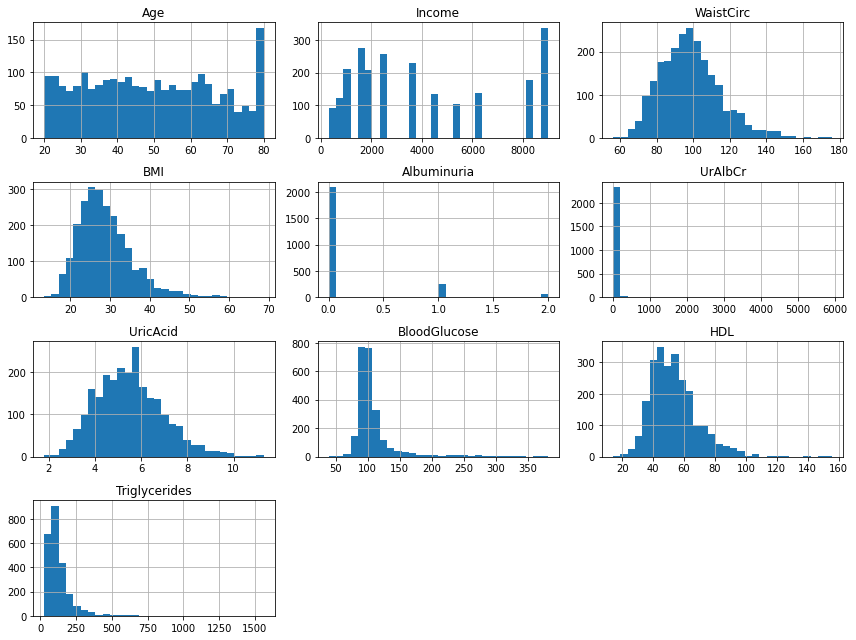

In [44]:
# Display histogram charts for the numeric columns in the dataframe
df.hist(figsize=(12,9), bins=30)
plt.tight_layout()
plt.show;

#### **Age**

In [45]:
# Display column statistics
df.Age.describe()

count    2401.000000
mean       48.691795
std        17.632852
min        20.000000
25%        34.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: Age, dtype: float64

In [46]:
# Display supplemental column statistics
column_statistics('Age')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 61


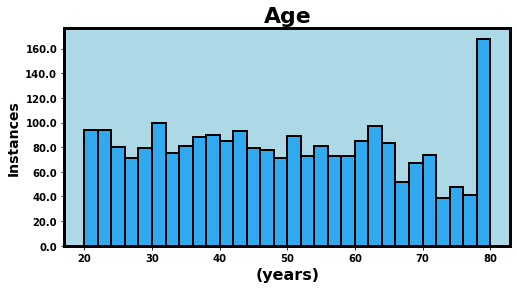

In [47]:
# Utilize function to display histogram plot
hist_plot('Age', '(years)', 30)

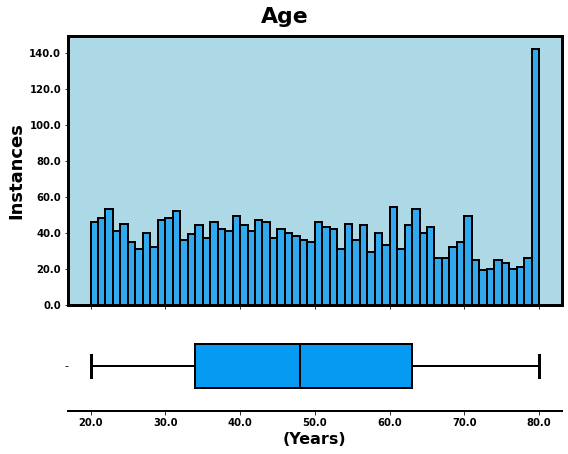

In [48]:
# Utilize function to display histogram and boxplot
hist_box_plot('Age', '(Years)', 60)

- **Dispersion** - 'Age' is fairly evenly dispersed, with the exception of the 79 year old value which is extremely high relative to other ages.
- **Skew** - 'Age' does not appear to be skewed.
- **Outliers** - 'Age' does not have any outliers.


#### **Income**

In [49]:
# Display column statistics
df.Income.describe()

count    2284.000000
mean     4005.253940
std      2954.032186
min       300.000000
25%      1600.000000
50%      2500.000000
75%      6200.000000
max      9000.000000
Name: Income, dtype: float64

In [50]:
# Display supplemental column statistics
column_statistics('Income')

Missing Values: 117 (4.9)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 14
9000.0    337
2500.0    257
3500.0    228
1000.0    210
2000.0    207
1600.0    190
8200.0    178
6200.0    138
4500.0    136
800.0     123
NaN       117
5400.0    103
300.0      93
1700.0     54
1500.0     30
Name: Income, dtype: int64


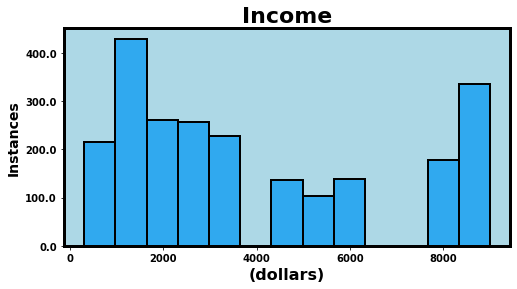

In [51]:
# Utilize function to display histogram plot
hist_plot('Income', '(dollars)', 'auto')

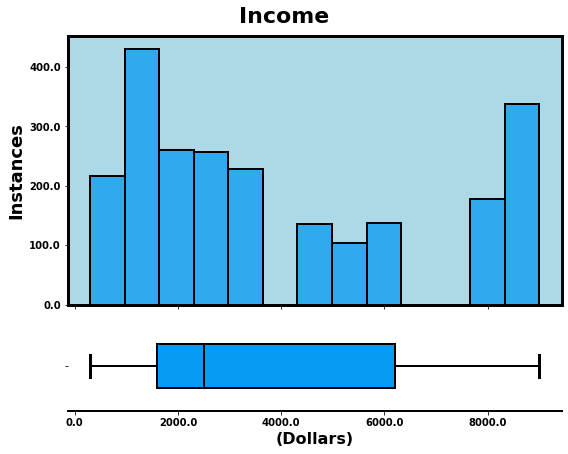

In [52]:
# Utilize function to display histogram and boxplot
hist_box_plot('Income', '(Dollars)', 'auto')

- **Dispersion** - 'Income' only has 14 unique values, and is not evenly dispersed.
- **Skew** - 'Income' is postively skewed.
- **Outliers** - 'Income' does not have any outliers.

#### **WaistCirc**

In [53]:
# Display column statistics
df.WaistCirc.describe()

count    2316.000000
mean       98.307254
std        16.252634
min        56.200000
25%        86.675000
50%        97.000000
75%       107.625000
max       176.000000
Name: WaistCirc, dtype: float64

In [54]:
# Display supplemental column statistics
column_statistics('WaistCirc')

Missing Values: 85 (3.5)%
Outliers: 0 (0.0)% low, 44 (1.8)% high
Unique values: 635


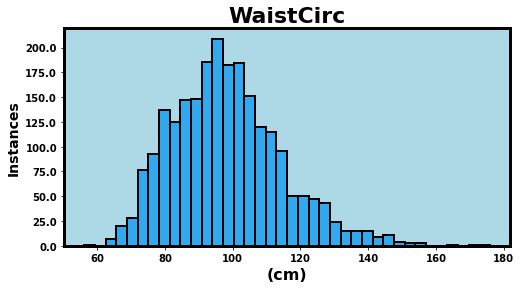

In [55]:
# Utilize function to display histogram plot
hist_plot('WaistCirc', '(cm)', 'auto')

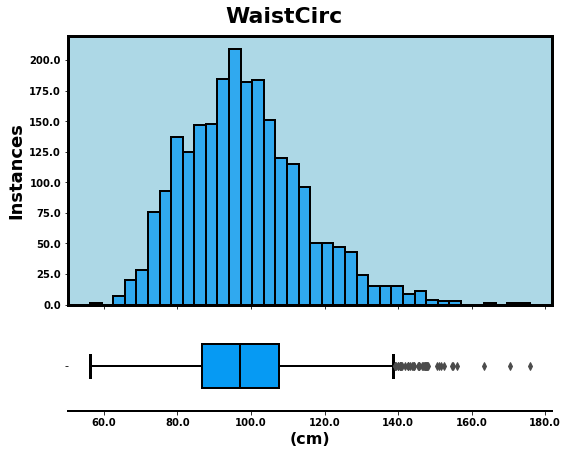

In [56]:
# Utilize function to display histogram and boxplot
hist_box_plot('WaistCirc', '(cm)', 'auto')

- **Dispersion** - 'WaistCirc' is not evenly dispersed.
- **Skew** - 'WaistCirc' does not appear to be skewed.
- **Outliers** - 'WaistCirc' has 44 (1.8%) outliers on the high side. 

#### **BMI**

In [57]:
# Display column statistics
df.BMI.describe()

count    2375.000000
mean       28.702189
std         6.662242
min        13.400000
25%        24.000000
50%        27.700000
75%        32.100000
max        68.700000
Name: BMI, dtype: float64

In [58]:
# Display supplemental column statistics
column_statistics('BMI')

Missing Values: 26 (1.1)%
Outliers: 0 (0.0)% low, 67 (2.8)% high
Unique values: 322


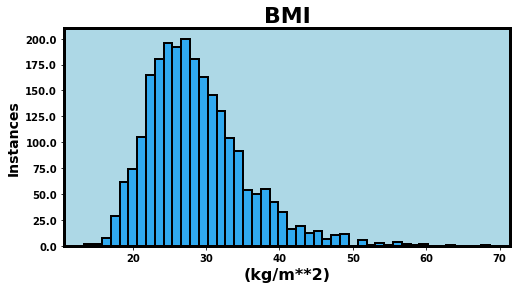

In [59]:
# Utilize function to display histogram plot
hist_plot('BMI', '(kg/m**2)', 'auto')

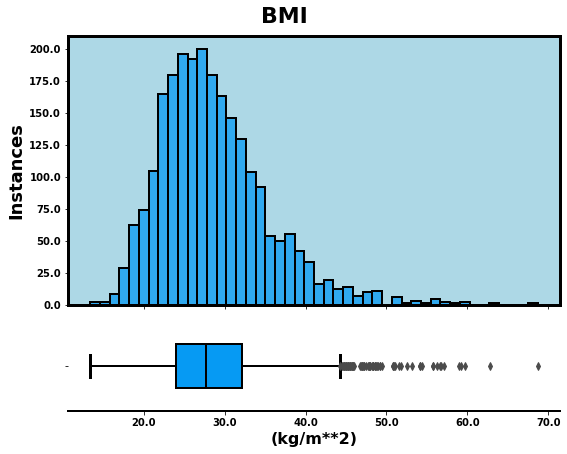

In [60]:
# Utilize function to display histogram and boxplot
hist_box_plot('BMI', '(kg/m**2)', 'auto')

- **Dispersion** - 'WaistCirc' is not evenly dispersed.
- **Skew** - 'WaistCirc' does not appear to be skewed.
- **Outliers** - 'WaistCirc' has 67 (2.8%) outliers on the high side. 

#### **Albuminuria**

In [61]:
# Display column statistics
df.Albuminuria.describe()

count    2401.000000
mean        0.154102
std         0.422780
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Albuminuria, dtype: float64

In [62]:
# Display supplemental column statistics
column_statistics('Albuminuria')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 312 (13.0)% high
Unique values: 3
0    2089
1     254
2      58
Name: Albuminuria, dtype: int64


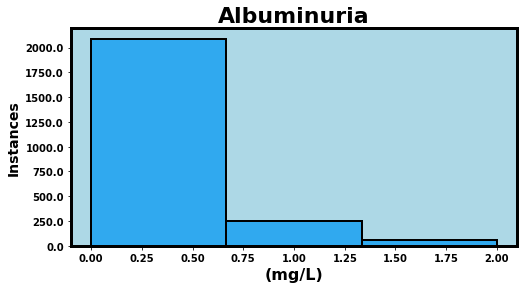

In [63]:
# Utilize function to display histogram plot
hist_plot('Albuminuria', '(mg/L)', 3)

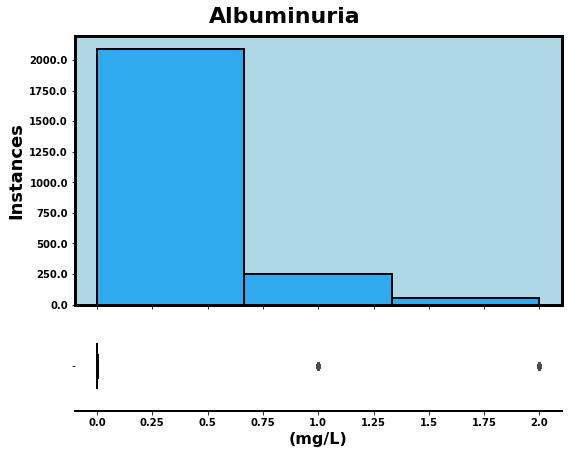

In [64]:
# Utilize function to display histogram and boxplot
hist_box_plot('Albuminuria', '(mg/L)', 3)

- Albuminuria is an ordinal column with values of 0, 1, and 2.
- It has a significant count of '0' values relative to the '1' and '2' values.
- **Outliers** - 'WaistCirc' has 312 (13.0%) outliers on the high side, this includes all of the '1' and '2' values.

#### **UrAlbCr**

In [65]:
# Display column statistics
df.UrAlbCr.describe()

count    2401.000000
mean       43.626131
std       258.272829
min         1.400000
25%         4.450000
50%         7.070000
75%        13.690000
max      5928.000000
Name: UrAlbCr, dtype: float64

In [66]:
# Display supplemental column statistics
column_statistics('UrAlbCr')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 332 (13.8)% high
Unique values: 1383


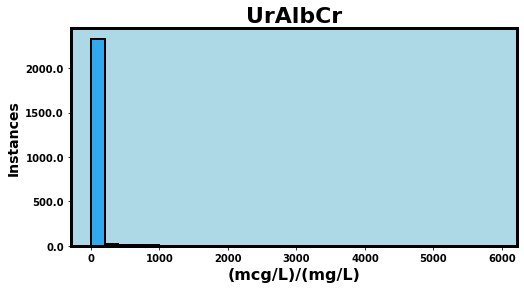

In [67]:
# Utilize function to display histogram plot
hist_plot('UrAlbCr', '(mcg/L)/(mg/L)', 30)

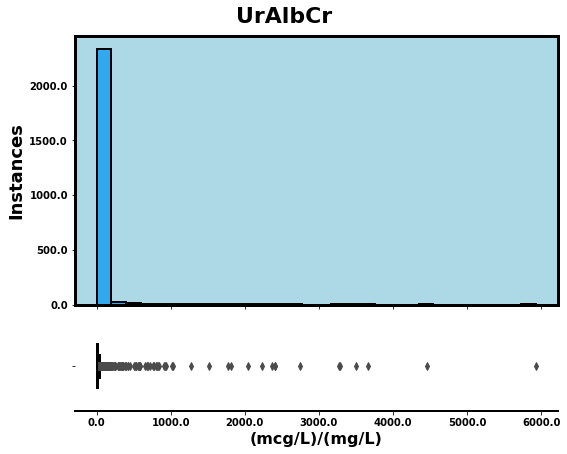

In [68]:
# Utilize function to display histogram and boxplot
hist_box_plot('UrAlbCr', '(mcg/L)/(mg/L)', 30)

- **Dispersion** - 'UrAlbCr' has the majority or its values between 0 and 100.
- **Outliers** - 'UrAlbCr' has 332 (13.8%) outliers on the high side. 

#### **UricAcid**

In [69]:
# Display column statistics
df.UricAcid.describe()

count    2401.000000
mean        5.489046
std         1.439358
min         1.800000
25%         4.500000
50%         5.400000
75%         6.400000
max        11.300000
Name: UricAcid, dtype: float64

In [70]:
# Display supplemental column statistics
column_statistics('UricAcid')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 30 (1.2)% high
Unique values: 88


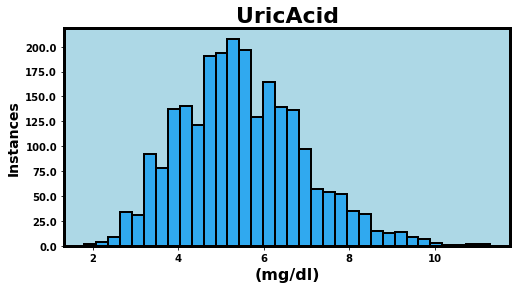

In [71]:
# Utilize function to display histogram plot
hist_plot('UricAcid', '(mg/dl)', 'auto')

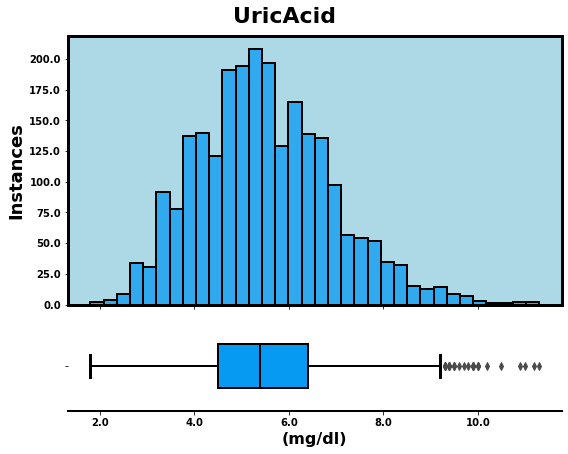

In [72]:
# Utilize function to display histogram and boxplot
hist_box_plot('UricAcid', '(mg/dl)', 'auto')

- **Dispersion** - 'UricAcid' is not evenly dispersed.
- **Skew** - 'UricAcid' is not skewed.
- **Outliers** - 'UricAcid' has 30 (1.2%) outliers in the high side.

#### **BloodGlucose**

In [73]:
# Display column statistics
df.BloodGlucose.describe()

count    2401.000000
mean      108.247813
std        34.820657
min        39.000000
25%        92.000000
50%        99.000000
75%       110.000000
max       382.000000
Name: BloodGlucose, dtype: float64

In [74]:
# Display supplemental column statistics
column_statistics('BloodGlucose')

Missing Values: 0 (0.0)%
Outliers: 6 (0.2)% low, 214 (8.9)% high
Unique values: 187


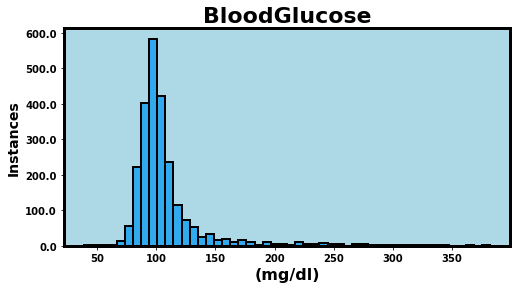

In [75]:
# Utilize function to display histogram plot
hist_plot('BloodGlucose', '(mg/dl)', 50)

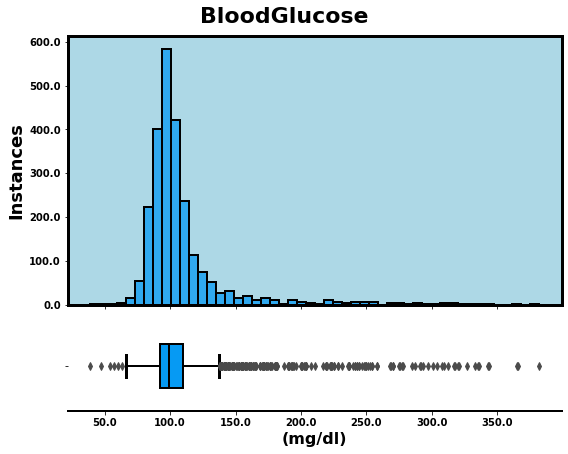

In [76]:
# Utilize function to display histogram and boxplot
hist_box_plot('BloodGlucose', '(mg/dl)', 50)

- **Dispersion** - 'BloodGlucose' is not evenly dispersed.
- **Skew** - 'BloodGlucose' is slightly positively skewed.
- **Outliers** - 'BloodGlucose' has 6 (0.2%) outliers on the low side, and 214 (8.9)% outliers on the high side.

#### **HDL**

In [77]:
# Display column statistics
df.HDL.describe()

count    2401.000000
mean       53.369429
std        15.185537
min        14.000000
25%        43.000000
50%        51.000000
75%        62.000000
max       156.000000
Name: HDL, dtype: float64

In [78]:
# Display supplemental column statistics
column_statistics('HDL')

Missing Values: 0 (0.0)%
Outliers: 1 (0.0)% low, 53 (2.2)% high
Unique values: 93


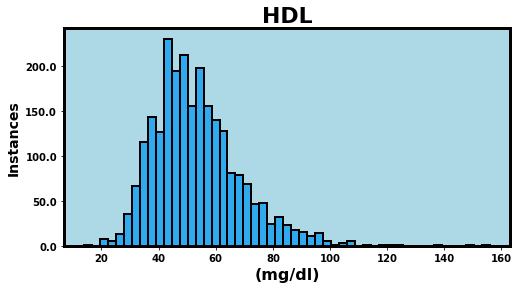

In [79]:
# Utilize function to display histogram plot
hist_plot('HDL', '(mg/dl)', 'auto')

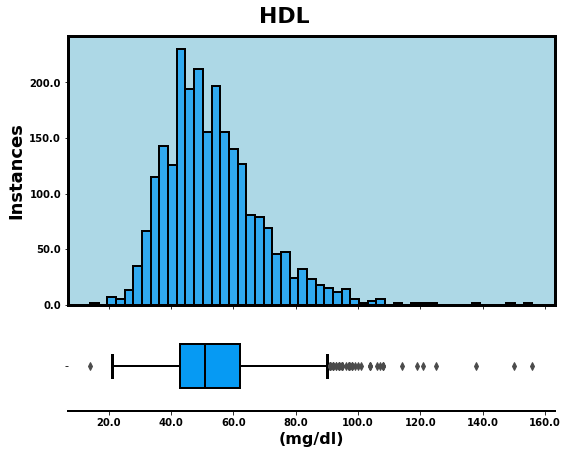

In [80]:
# Utilize function to display histogram and boxplot
hist_box_plot('HDL', '(mg/dl)', 'auto')

- **Dispersion** - 'HDL' is not evenly dispersed.
- **Skew** - 'HDL' is slightly positively skewed.
- **Outliers** - 'HDL' has only 1 (0.0%) outlier on the low side, 53 (2.2%) outliers on the high side.

#### **Triglycerides**

In [81]:
# Display column statistics
df.Triglycerides.describe()

count    2401.000000
mean      128.125364
std        95.322477
min        26.000000
25%        75.000000
50%       103.000000
75%       150.000000
max      1562.000000
Name: Triglycerides, dtype: float64

In [82]:
# Display supplemental column statistics
column_statistics('Triglycerides')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 161 (6.7)% high
Unique values: 345


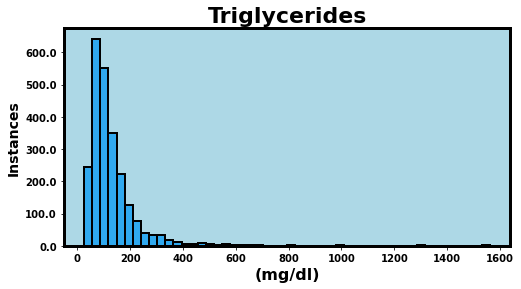

In [83]:
# Utilize function to display histogram plot
hist_plot('Triglycerides', '(mg/dl)', 50)

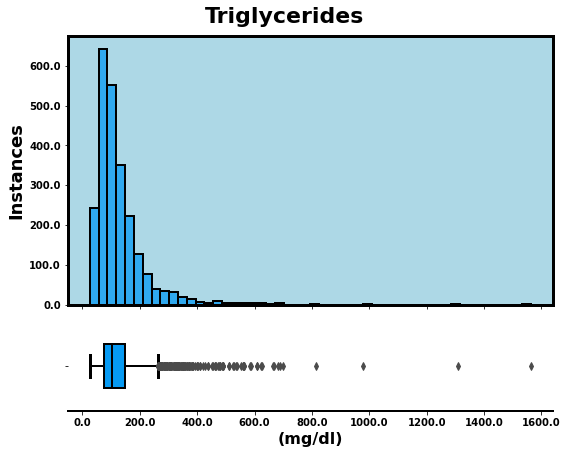

In [84]:
# Utilize function to display histogram and boxplot
hist_box_plot('Triglycerides', '(mg/dl)', 50)

- **Dispersion** - 'Triglycerides' is not evenly dispersed.
- **Skew** - 'Triglycerides' is slightly positively skewed.
- **Outliers** - 'Triglycerides' has 161 (6.7%) outliers on the high side.

### **Categorical Columns**

#### **Summary Statistics**

In [85]:
# Display the descriptive statistics for the non-numeric columns
df.describe(exclude=('number'))

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2401,2401,2401
unique,2,6,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


- No issues noted.

#### **Sex**

In [86]:
# Display column statistics
df.Sex.describe()

count       2401
unique         2
top       Female
freq        1211
Name: Sex, dtype: object

In [87]:
# Display supplemental column statistics
column_statistics('Sex')

Missing Values: 0 (0.0)%
Unique values: 2
Female    1211
Male      1190
Name: Sex, dtype: int64


In [88]:
# Display normailzed value counts
df['Sex'].value_counts(normalize=True)

Female    0.504373
Male      0.495627
Name: Sex, dtype: float64

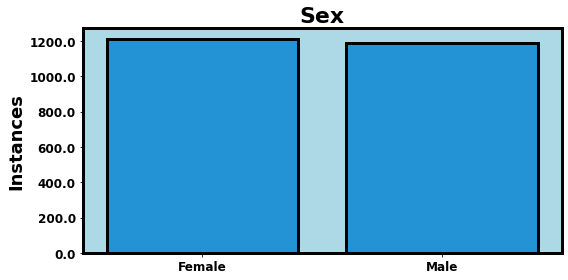

In [89]:
# Utilize function to display count plot
count_plot('Sex', ['Female', 'Male'])

- Sex appears to be fairly evenly balanced between the two values.

#### **Marital**

In [90]:
# Display column statistics
df.Marital.describe()

count        2401
unique          6
top       Married
freq         1192
Name: Marital, dtype: object

In [91]:
# Display supplemental column statistics
column_statistics('Marital')

Missing Values: 0 (0.0)%
Unique values: 6
Married      1192
Single        498
Divorced      242
Unknown       208
Widowed       166
Separated      95
Name: Marital, dtype: int64


In [92]:
# Display normailzed value counts
df['Marital'].value_counts(normalize=True)

Married      0.496460
Single       0.207414
Divorced     0.100791
Unknown      0.086631
Widowed      0.069138
Separated    0.039567
Name: Marital, dtype: float64

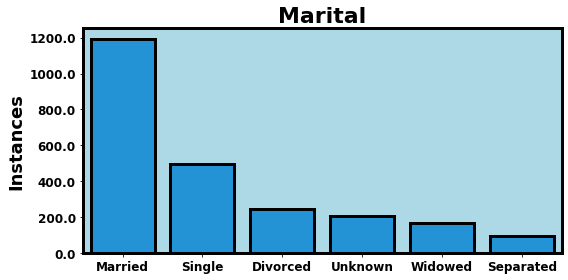

In [93]:
# Utilize function to display count plot
count_plot('Marital', ['Married',
              'Single', 'Divorced', 'Unknown', 'Widowed', 'Separated'])

- 'Married' has significantly more values, followed by 'Single'.

#### **MetabolicSyndrome**

In [94]:
# Display column statistics
df.MetabolicSyndrome.describe()

count          2401
unique            2
top       No MetSyn
freq           1579
Name: MetabolicSyndrome, dtype: object

In [95]:
# Display supplemental column statistics
column_statistics('MetabolicSyndrome')

Missing Values: 0 (0.0)%
Unique values: 2
No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64


In [96]:
# Display normailzed value counts
df['MetabolicSyndrome'].value_counts(normalize=True)

No MetSyn    0.657643
MetSyn       0.342357
Name: MetabolicSyndrome, dtype: float64

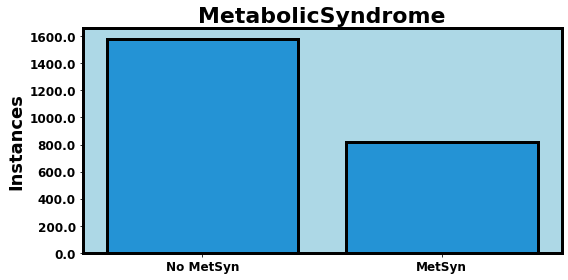

In [97]:
# Utilize function to display count plot
count_plot('MetabolicSyndrome', ['No MetSyn', 'MetSyn'])

- There are significantly more 'No MetSyn' (negative) values than 'MetSyn' (positive) values.
- This is our target value to predict and it is unbalanced.

In [98]:
# Define a dictionary with key/value pairs and use it to replace values
dict = {'No MetSyn': 'Negative', 'MetSyn': 'Positive'}
df.replace({'MetabolicSyndrome': dict}, inplace = True)


### **Explanatory Data Analysis**

#### **WaistCirc and Age correlation to MetabolicSyndrome**

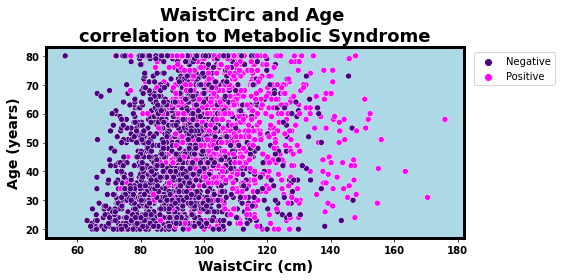

In [99]:
scatter_plot('WaistCirc', 'Age', '(cm)', '(years)')

#### **BMI and Age correlation to MetabolicSyndrome**

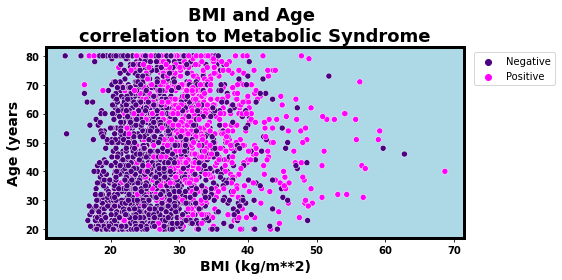

In [100]:
scatter_plot('BMI', 'Age', '(kg/m**2)', '(years')

#### **Albuminuria and Age correlation to MetabolicSyndrome**

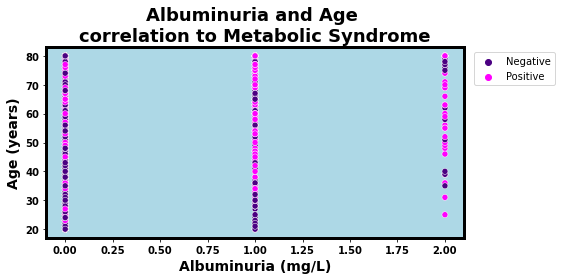

In [101]:
scatter_plot('Albuminuria', 'Age', '(mg/L)', '(years)')

#### **UrAlbCr and Age correlation to MetabolicSyndrome**

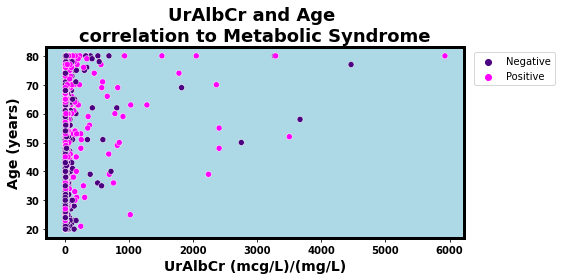

In [102]:
scatter_plot('UrAlbCr', 'Age', '(mcg/L)/(mg/L)', '(years)')

#### **UricAcid and Age correlation to MetabolicSyndrome**

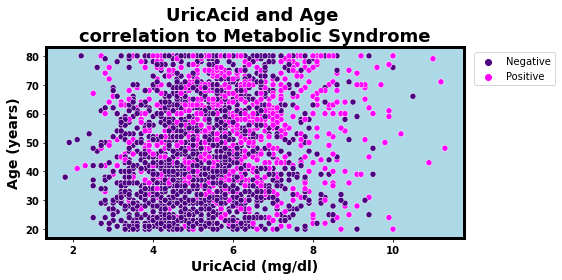

In [103]:
scatter_plot('UricAcid', 'Age', '(mg/dl)', '(years)')

#### **BloodGlucose and Age correlation to MetabolicSyndrome**

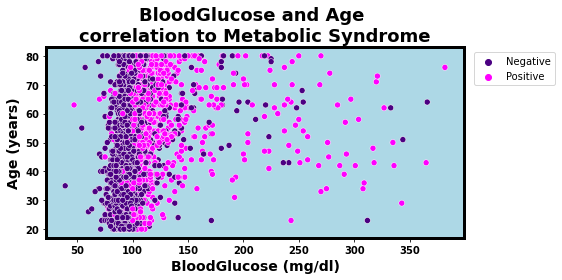

In [104]:
scatter_plot('BloodGlucose', 'Age', '(mg/dl)', '(years)')

#### **HDL and Age correlation to MetabolicSyndrome**

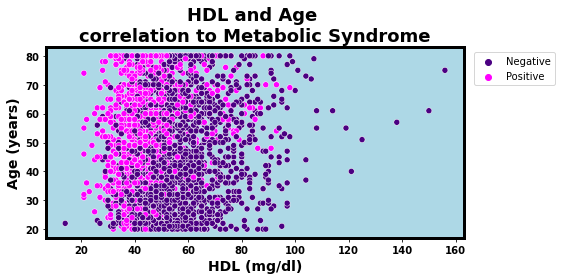

In [105]:
scatter_plot('HDL', 'Age', '(mg/dl)', '(years)')

#### **Triglycerides and Age correlation to MetabolicSyndrome**

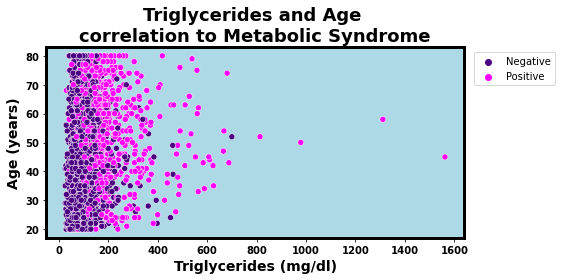

In [106]:
scatter_plot('Triglycerides', 'Age', '(mg/dl)', '(years)')

#### **Marital and Age correlation to MetabolicSyndrome**

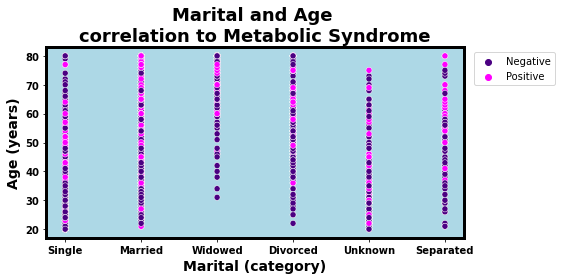

In [107]:
scatter_plot('Marital', 'Age', '(category)', '(years)')

#### **Sex and Age correlation to MetabolicSyndrome**

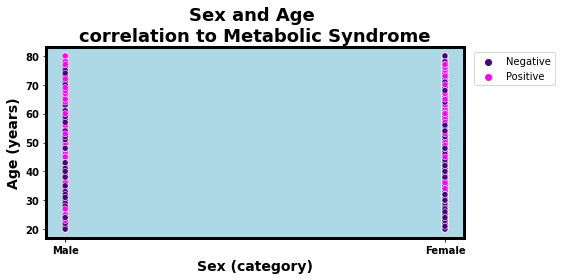

In [108]:
scatter_plot('Sex', 'Age', '(category)', '(years)')

### **Correlation Heatmap**

- If we encode 'No Metsyn' to 0 and 'MetSyn' to 1 we can view the correlations with the numeric features.

In [109]:
# Define a dictionary with key/value pairs and use it to replace values
dict = {"Negative": 0, "Positive": 1}
df.replace({'MetabolicSyndrome': dict}, inplace = True)
df.MetabolicSyndrome.astype('int32').dtypes

dtype('int32')

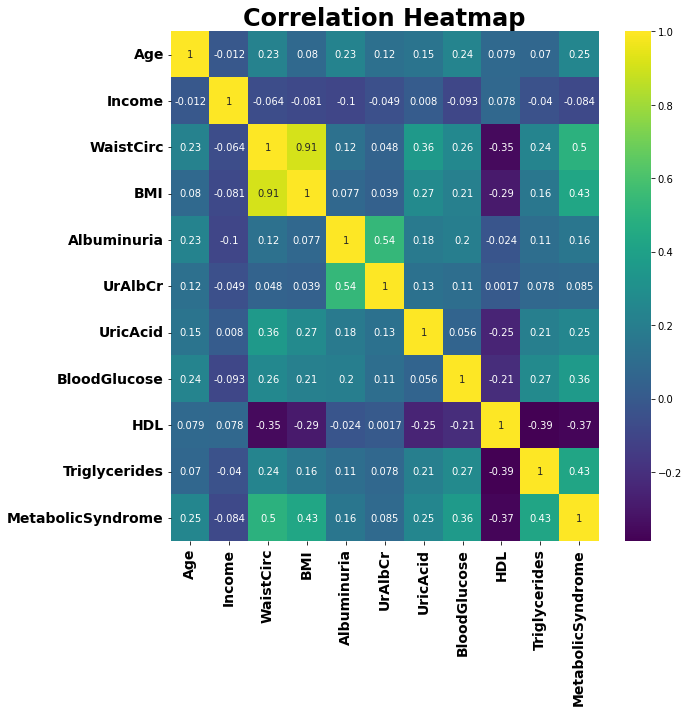

In [110]:
plt.figure(figsize = (10, 10),facecolor='w' )
corr = df.corr()
sns.heatmap(corr, cmap='viridis', annot=True);
plt.title('Correlation Heatmap', fontsize = 24, weight='bold')
plt.xticks(fontsize = 14, weight='bold', rotation=90)
plt.yticks(fontsize = 14, weight='bold', rotation=0);
plt.tight_layout()
plt.show;

- BMI and WaistCirc have high positive correlation of 0.91. Body mass index (BMI) is a measure of body fat percentage based on height and weight that applies to adult men and women. BMI and WaistCirc are both dependent variables of height and weight.

## **Preprocessing/Processing for Machine Learning**

### **Identify each feature as ordinal, numerical, nominal, or pass through**

- ordinal features = none
- numeric features = ['Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria	UrAlbCr	UricAcid	BloodGlucose	HDL	Triglycerides]
- nominal features = ['Sex', 'Marital', 'MetabolicSyndrome']
- date/time features = none
- pass through = none

### **Evaluate if Target is Balanced**

In [111]:
# Display normalized target value counts
df['MetabolicSyndrome'].value_counts(normalize=True)

0    0.657643
1    0.342357
Name: MetabolicSyndrome, dtype: float64

- The target 'MetabolicSyndrome', is not balanced, so 'stratify=y' will be used with the Train Test split.

### **Validation Split**

In [112]:
# Define features (X) and target (y)
X = df.drop(columns = ['MetabolicSyndrome'])
y = df['MetabolicSyndrome']

In [113]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Instantiate Column Selectors**

In [114]:
# Create column selectors.
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [115]:
# Display the list of categorical column names.
cat_selector(X_train)

['Sex', 'Marital', 'Race']

In [116]:
# Display the list of numeric column names.
num_selector(X_train)

['Age',
 'Income',
 'WaistCirc',
 'BMI',
 'Albuminuria',
 'UrAlbCr',
 'UricAcid',
 'BloodGlucose',
 'HDL',
 'Triglycerides']

### **Instantiate Transformers**

In [117]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One Hot Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

### **Instantiate Pipelines**

In [118]:
# Create the numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
# Display the numeric pipeline
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [119]:
# Create the categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
# Display the categorical pipeline
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### **Instantiate ColumnTransformer**

In [120]:
# Create tuples for the Column Transformers
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# Create the ColumnTransformer
preprocessor = make_column_transformer(number_tuple, 
                                       category_tuple, 
                                       remainder='passthrough')
# Display the ColumnTransformer
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2569fdc550>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._colum

### **Fit and Transform Data**

In [121]:
# Fit on Train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2569fdc550>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._colum

In [122]:
# Transform Train and Test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### **Inspect the Result**

In [123]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (1920, 24)




array([[-1.46331187, -1.06720314,  1.70862426, ...,  0.        ,
         0.        ,  0.        ],
       [-0.08297592,  1.48903238, -0.07638034, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54308791,  1.48903238, -0.03284364, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.14708007,  0.79815791,  0.99959804, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03205207, -0.47995985,  0.76325597, ...,  0.        ,
         0.        ,  1.        ],
       [-0.6581159 ,  1.76538217,  0.12264456, ...,  0.        ,
         0.        ,  0.        ]])

In [124]:
X_test_df = pd.DataFrame(X_test_processed)
X_train_df = pd.DataFrame(X_train_processed)

In [125]:
X_train_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,1920.00,1920.00,1920.00,1920.00,1920.00,1920.00,1920.00,1920.00,1920.00,1920.00,...,1920.00,1920.00,1920.00,1920.00,1920.00,1920.00,1920.00,1920.00,1920.00,1920.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,...,0.04,0.21,0.09,0.06,0.15,0.22,0.11,0.11,0.02,0.39
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.20,0.41,0.28,0.25,0.35,0.42,0.31,0.31,0.15,0.49
min,-1.64,-1.24,-2.63,-2.33,-0.36,-0.17,-2.51,-2.02,-2.64,-1.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.83,-0.79,-0.70,-0.70,-0.36,-0.16,-0.69,-0.46,-0.69,-0.55,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.08,-0.48,-0.08,-0.14,-0.36,-0.15,-0.06,-0.25,-0.15,-0.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.84,0.80,0.57,0.54,-0.36,-0.12,0.64,0.07,0.52,0.21,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.81,1.77,4.82,6.06,4.46,19.38,4.06,8.11,5.70,14.61,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [126]:
X_test_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,...,481.00,481.0,481.00,481.00,481.00,481.00,481.00,481.0,481.00,481.00
mean,0.07,0.07,-0.08,-0.04,0.06,0.06,0.01,0.11,0.06,0.01,...,0.04,0.2,0.09,0.09,0.14,0.25,0.11,0.1,0.03,0.36
std,1.07,1.01,0.96,1.02,1.09,1.55,1.03,1.13,1.10,0.84,...,0.19,0.4,0.29,0.28,0.35,0.43,0.32,0.3,0.17,0.48
min,-1.64,-1.24,-2.14,-1.69,-0.36,-0.17,-2.58,-0.84,-2.17,-1.01,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,-0.89,-0.79,-0.72,-0.76,-0.36,-0.16,-0.69,-0.43,-0.69,-0.52,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
50%,0.09,-0.13,-0.11,-0.22,-0.36,-0.15,-0.13,-0.22,-0.08,-0.22,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
75%,0.89,0.80,0.40,0.34,-0.36,-0.12,0.71,0.10,0.66,0.23,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00
max,1.81,1.77,3.51,4.30,4.46,25.80,3.99,7.64,6.91,5.70,...,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00


## **KNN Model**

#### **KNN Model Processor**

In [127]:
# Make an instance of the Model
knn = KNeighborsClassifier()

#### **Create Pipelines**

In [128]:
# Create Pipeline
knn_model_processor = make_pipeline(knn)

#### **Fit and Transform Data**

In [129]:
# Fit on Train
knn_model_processor.fit(X_train_processed, y_train)

Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier())])

#### **Accuracy Score**

In [130]:
# Calculate Model Accuracy
knn_model_accuracy = accuracy_score(y_test, knn_model_processor.predict(X_test_processed))
# Display Model Accuracy
print(f'KNN Model Accuracy = {knn_model_accuracy}')

KNN Model Accuracy = 0.8108108108108109


#### **Tune Hyperparameters**

##### **Display Hyperparameters**

In [131]:
# Display the hyperparameters.
knn_model_processor.get_params()

{'kneighborsclassifier': KNeighborsClassifier(),
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform',
 'memory': None,
 'steps': [('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False}

##### **Tune with Loop**

In [132]:
# Tune K utilizing a loop.
krange = range(1, 15)
k_list = []
for k in krange: 
  knn_model_processor = make_pipeline(KNeighborsClassifier(n_neighbors=k))
  knn_model_processor.fit(X_train_processed, y_train)
  score = accuracy_score(y_test, knn_model_processor.predict(X_test_processed))
  k_list.append(score)

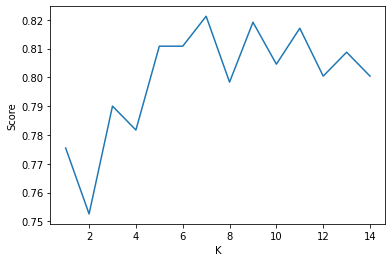

In [133]:
# Visualize Accuracy Scores.
plt.plot(krange, k_list)
plt.xlabel('K')
plt.ylabel('Score');

In [134]:
# Create Pipeline utilizing hyperparameters with highest accuracy
knn_model_processor = make_pipeline(KNeighborsClassifier(n_neighbors=11))
# Fit on Train
knn_model_processor.fit(X_train_processed, y_train)

Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [135]:
# Print Model Accuracy Score
knn_model_accuracy = accuracy_score(y_test, knn_model_processor.predict(X_test_processed))
print(f'KNN Model Accuracy Score = {knn_model_accuracy}')

KNN Model Accuracy Score = 0.817047817047817


##### **Tune using GridSearch**

###### **Select Hyperparameters**

In [136]:
# Select hyperparameters
knn_parameters = { 'kneighborsclassifier__n_neighbors': [8,9,10,11,12,13,14], 
                  'kneighborsclassifier__leaf_size': [2, 3, 4, 5,10,15,20,25]} 

###### **Instantiate Grid Search**

In [137]:
# Instantiate Gridsearch
knn_grid = GridSearchCV(knn_model_processor, knn_parameters)
# Fit GridSearch
knn_grid.fit(X_train_processed, y_train)

GridSearchCV(estimator=Pipeline(steps=[('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=11))]),
             param_grid={'kneighborsclassifier__leaf_size': [2, 3, 4, 5, 10, 15,
                                                             20, 25],
                         'kneighborsclassifier__n_neighbors': [8, 9, 10, 11, 12,
                                                               13, 14]})

In [138]:
# Display the best hyperparameters From GridSearchCV.
knn_grid.best_params_

{'kneighborsclassifier__leaf_size': 2, 'kneighborsclassifier__n_neighbors': 9}

In [139]:
# Extract KNN Model with best hyperparameters.
best_knn = knn_grid.best_estimator_

### **Predictions**

In [140]:
# Predictions from KNN Model with the best hyperparameters.
knn_train_preds = best_knn.predict(X_train_processed)
knn_test_preds = best_knn.predict(X_test_processed)

### **Scores**

###### **Accuracy Scores**

In [141]:
# Calculate classification accuracy scores
knn_train_accuracy = best_knn.score(X_train_processed, y_train)
knn_test_accuracy = best_knn.score(X_test_processed, y_test)
# Print classification accuracy scores
print(f'KNN Train Accuracy Score: {knn_train_accuracy}')
print(f'KNN Test Accuracy Score: {knn_test_accuracy}')

KNN Train Accuracy Score: 0.8484375
KNN Test Accuracy Score: 0.8191268191268192


###### **Recall Scores**

In [142]:
# Calculate classification recall scores
knn_train_recall = recall_score(y_train, knn_train_preds, pos_label=1)
knn_test_recall = recall_score(y_test, knn_test_preds, pos_label=1)
# Print classification recall scores
print(f'KNN Train Recall Score = {knn_train_recall}')
print(f'KNN Test Recall Score = {knn_test_recall}')

KNN Train Recall Score = 0.69558599695586
KNN Test Recall Score = 0.6060606060606061


###### **Precision Scores**

In [143]:
# Calculate classification precision scores
knn_train_precision = precision_score(y_train, knn_train_preds, pos_label=1)
knn_test_precision = precision_score(y_test, knn_test_preds, pos_label=1)
# Print recall scores
print(f'KNN Train Precision Score = {knn_train_precision}')
print(f'KNN Test Precision Score = {knn_test_precision}')

KNN Train Precision Score = 0.833941605839416
KNN Test Precision Score = 0.819672131147541


###### **AUC**

In [144]:
# Calculate AUC scores
knn_train_auc = roc_auc_score(y_train, best_knn.predict_proba(X_train_processed)[:,1])
knn_test_auc = roc_auc_score(y_test, best_knn.predict_proba(X_test_processed)[:,1])
# Display AUC scores
print(f'KNN Train AUC: {knn_train_auc}')
print(f'KNN Test AUC: {knn_test_auc}')

KNN Train AUC: 0.9270454849474145
KNN Test AUC: 0.9008342922899886


## **Logistic Regression Model**

### **Instantiate the Linear Regression Model**

In [145]:
# Make an instance of the model
logreg = LogisticRegression(C = 1000)

### **Create the Pipeline**

In [146]:
# Create pipeline
logreg_pipe = make_pipeline(logreg)

### **Fit and Train the Model on the Data**

In [147]:
# Fit the model
logreg_pipe.fit(X_train_processed,y_train)

Pipeline(steps=[('logisticregression', LogisticRegression(C=1000))])

### **Print Training Scores**

In [148]:
# Print Scores
print(logreg_pipe.score(X_train_processed, y_train))
print(logreg_pipe.score(X_test_processed, y_test))

0.8447916666666667
0.8461538461538461


### **Hyperparameter Tuning**

#### **L1 Tuning**

##### **Wideband Tuning**

{0.0001: 0.656964656964657,
 0.001: 0.656964656964657,
 0.01: 0.814968814968815,
 0.1: 0.8378378378378378,
 1: 0.8440748440748441,
 10: 0.8440748440748441,
 100: 0.8461538461538461,
 1000: 0.8461538461538461}

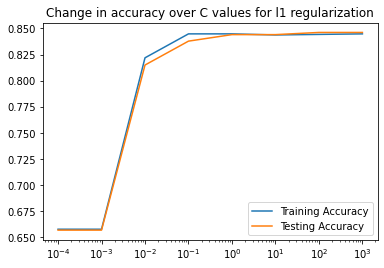

In [149]:
# Create a list of C values and empty lists for accuracy scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
 
# Create a loop to iterative over the C values list
for c in c_values:
 
  # Instantiate and Fit the Model on the data
  log_reg = LogisticRegression(C=c, 
                               max_iter=1000, 
                               solver='liblinear', 
                               penalty='l1')
  log_reg_pipe = make_pipeline(log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # Add the Train and Test Scores to our Scores Lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
# Plot the Accuracy Scores for the C Values
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
# Set the X Axis to a logarithmic Scale
ax.set_xscale('log')

# Print a Dictionary for C Values and Accuracy Scores
{c:score for c, score in zip(c_values, test_scores)}

##### **Fine Tuning**

{1: 0.8440748440748441,
 2: 0.8440748440748441,
 3: 0.8440748440748441,
 4: 0.8440748440748441,
 5: 0.8440748440748441,
 6: 0.8440748440748441,
 7: 0.8440748440748441,
 8: 0.8440748440748441,
 9: 0.8440748440748441,
 10: 0.8440748440748441,
 20: 0.8461538461538461,
 30: 0.8461538461538461,
 40: 0.8461538461538461,
 50: 0.8461538461538461}

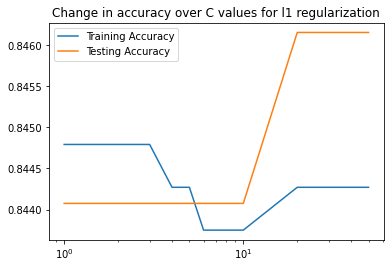

In [150]:
# Create a list of C values and empty lists for accuracy scores
c_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]
train_scores = []
test_scores = []
 
# Create a loop to iterative over the C values list
for c in c_values:
 
  # Instantiate and Fit the Model on the data
  log_reg = LogisticRegression(C=c, 
                               max_iter=1000, 
                               solver='liblinear', 
                               penalty='l1')
  log_reg_pipe = make_pipeline(log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # Add the Train and Test Scores to our Scores Lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
# Plot the Accuracy Scores for the C Values
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
# Set the X Axis to a logarithmic Scale
ax.set_xscale('log')

# Print a Dictionary for C Values and Accuracy Scores
{c:score for c, score in zip(c_values, test_scores)}

##### **Best L1 Tuned Logistics Regression Model**

In [151]:
best_l1_log_reg = LogisticRegression(C=2, 
                                     max_iter=1000, 
                                     solver='liblinear', 
                                     penalty='l1')
best_l1_log_reg_pipe = make_pipeline(best_l1_log_reg)
best_l1_log_reg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('logisticregression',
                 LogisticRegression(C=2, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

##### **Predictions**

In [152]:
# Predictions from Best L1 Tuned Logistics Regression Model
log_reg_l1_train_preds = best_l1_log_reg_pipe.predict(X_train_processed)
log_reg_l1_test_preds = best_l1_log_reg_pipe.predict(X_test_processed)

##### **Scores**

###### **Accuracy Scores**

In [153]:
# Calculate classification accuracy scores
log_reg_l1_train_accuracy = best_l1_log_reg_pipe.score(X_train_processed, y_train)
log_reg_l1_test_accuracy = best_l1_log_reg_pipe.score(X_test_processed, y_test)
# Print classification accuracy scores
print(f'Logistics Regression L1 tuned Train Accuracy Score: {log_reg_l1_train_accuracy}')
print(f'Logistics Regression L1 tuned Test Accuracy Score: {log_reg_l1_test_accuracy}')

Logistics Regression L1 tuned Train Accuracy Score: 0.8447916666666667
Logistics Regression L1 tuned Test Accuracy Score: 0.8440748440748441


###### **Recall Scores**

In [154]:
# Calculate classification recall scores
log_reg_l1_train_recall = recall_score(y_train, log_reg_l1_train_preds, pos_label=1)
log_reg_l1_test_recall = recall_score(y_test, log_reg_l1_test_preds, pos_label=1)
# Print recall scores
print(f'Logistics Regression L1 tuned Train Recall Score: {log_reg_l1_train_recall}')
print(f'Logistics Regression L1 tuned Test Accuracy Score: {log_reg_l1_test_recall}')

Logistics Regression L1 tuned Train Recall Score: 0.715372907153729
Logistics Regression L1 tuned Test Accuracy Score: 0.7151515151515152


###### **Precision Scores**

In [155]:
# Calculate classification recall scores
log_reg_l1_train_precision = precision_score(y_train, log_reg_l1_train_preds, pos_label=1)
log_reg_l1_test_precision = precision_score(y_test, log_reg_l1_test_preds, pos_label=1)
# Display recall scores
print(f'Logistics Regression L1 tuned Train Precision Score: {log_reg_l1_train_precision}')
print(f'Logistics Regression L1 tuned Test Recall Score: {log_reg_l1_test_precision}')

Logistics Regression L1 tuned Train Precision Score: 0.8089500860585198
Logistics Regression L1 tuned Test Recall Score: 0.8082191780821918


###### **AUC**

In [156]:
# Calculate AUC scores
log_reg_l1_train_auc = roc_auc_score(y_train, best_l1_log_reg_pipe.predict_proba(X_train_processed)[:,1])
log_reg_l1_test_auc = roc_auc_score(y_test, best_l1_log_reg_pipe.predict_proba(X_test_processed)[:,1])
# Display AUC scores
print(f'Logistics Regression L1 tuned Train AUC Score: {log_reg_l1_train_auc}')
print(f'Logistics Regression L1 tuned Test AUC Score: {log_reg_l1_test_auc}')

Logistics Regression L1 tuned Train AUC Score: 0.9154172556704037
Logistics Regression L1 tuned Test AUC Score: 0.9082086689681627


#### **L2 Tuning**

##### **Wideband Tuning**

{0.0001: 0.814968814968815,
 0.001: 0.8274428274428275,
 0.01: 0.841995841995842,
 0.1: 0.8461538461538461,
 1: 0.8461538461538461,
 10: 0.8461538461538461,
 100: 0.8461538461538461,
 1000: 0.8461538461538461}

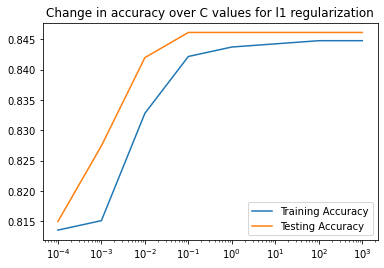

In [157]:
# Create a list of C values and empty lists for accuracy scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
 
# Create a loop to iterative over the C values list
for c in c_values:
 
  # Instantiate and Fit the Model on the data
  log_reg = LogisticRegression(C=c, 
                               max_iter=1000, 
                               solver='liblinear', 
                               penalty='l2')
  log_reg_pipe = make_pipeline(log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # Add the Train and Test Scores to our Scores Lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
# Plot the Accuracy Scores for the C Values
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
# Set the X Axis to a logarithmic Scale
ax.set_xscale('log')

# Print a Dictionary for C Values and Accuracy Scores
{c:score for c, score in zip(c_values, test_scores)}

##### **Fine Tuning**

{0.005: 0.83991683991684,
 0.006: 0.841995841995842,
 0.007: 0.8440748440748441,
 0.008: 0.841995841995842,
 0.009: 0.841995841995842,
 0.01: 0.841995841995842,
 0.02: 0.8440748440748441,
 0.03: 0.83991683991684,
 0.04: 0.8440748440748441,
 0.05: 0.8440748440748441}

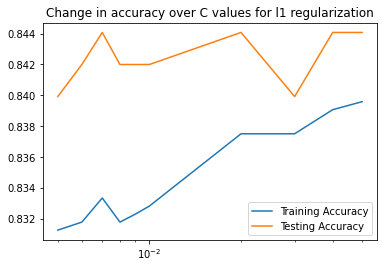

In [158]:
# Create a list of C values and empty lists for accuracy scores
c_values =  [.005, .006, .007, .008, .009, .010, .020, .030, .040, .050]
train_scores = []
test_scores = []
 
# Create a loop to iterative over the C values list
for c in c_values:
 
  # Instantiate and Fit the Model on the data
  log_reg = LogisticRegression(C=c, 
                               max_iter=1000, 
                               solver='liblinear', 
                               penalty='l2')
  log_reg_pipe = make_pipeline(log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # Add the Train and Test Scores to our Scores Lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
# Plot the Accuracy Scores for the C Values
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
# Set the X Axis to a logarithmic Scale
ax.set_xscale('log')

# Print a Dictionary for C Values and Accuracy Scores
{c:score for c, score in zip(c_values, test_scores)}

##### **Best L2 Tuned Logistics Regression Model**

In [159]:
best_l2_log_reg = LogisticRegression(C=.020, 
                                     max_iter=1000, 
                                     solver='liblinear', 
                                     penalty='l2')
best_l2_log_reg_pipe = make_pipeline(best_l2_log_reg)
best_l2_log_reg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('logisticregression',
                 LogisticRegression(C=0.02, max_iter=1000,
                                    solver='liblinear'))])

##### **Predictions**

In [160]:
# Predictions from Best L2 Tuned Logistics Regression Model
log_reg_l2_train_preds = best_l2_log_reg_pipe.predict(X_train_processed)
log_reg_l2_test_preds = best_l2_log_reg_pipe.predict(X_test_processed)

##### **Scores**

###### **Accuracy Scores**

In [161]:
# Calculate classification accuracy scores
log_reg_l2_train_accuracy = best_l2_log_reg_pipe.score(X_train_processed, y_train)
log_reg_l2_test_accuracy = best_l2_log_reg_pipe.score(X_test_processed, y_test)
# Print classification accuracy scores
print(f'Logistics Regression L2 tuned Train Accuracy Score: {log_reg_l2_train_accuracy}')
print(f'Logistics Regression L2 tuned Test Accuracy Score: {log_reg_l2_test_accuracy}')

Logistics Regression L2 tuned Train Accuracy Score: 0.8375
Logistics Regression L2 tuned Test Accuracy Score: 0.8440748440748441


###### **Recall Scores**

In [162]:
# Calculate classification recall scores
log_reg_l2_train_recall = recall_score(y_train, log_reg_l2_train_preds, pos_label=1)
log_reg_l2_test_recall = recall_score(y_test, log_reg_l2_test_preds, pos_label=1)
# Print recall scores
print(f'Logistics Regression L2 tuned Train Recall Score: {log_reg_l2_train_recall}')
print(f'Logistics Regression L2 tuned Test Accuracy Score: {log_reg_l2_test_recall}')

Logistics Regression L2 tuned Train Recall Score: 0.6864535768645358
Logistics Regression L2 tuned Test Accuracy Score: 0.703030303030303


###### **Precision Scores**

In [163]:
# Calculate classification recall scores
log_reg_l2_train_precision = precision_score(y_train, log_reg_l2_train_preds, pos_label=1)
log_reg_l2_test_precision = precision_score(y_test, log_reg_l2_test_preds, pos_label=1)
# Display recall scores
print(f'Logistics Regression L2 tuned Train Precision Score: {log_reg_l2_train_precision}')
print(f'Logistics Regression L2 tuned Test Recall Score: {log_reg_l2_test_precision}')

Logistics Regression L2 tuned Train Precision Score: 0.8096947935368043
Logistics Regression L2 tuned Test Recall Score: 0.8169014084507042


###### **AUC**

In [164]:
# Calculate AUC scores
log_reg_l2_train_auc = roc_auc_score(y_train, best_l2_log_reg_pipe.predict_proba(X_train_processed)[:,1])
log_reg_l2_test_auc = roc_auc_score(y_test, best_l2_log_reg_pipe.predict_proba(X_test_processed)[:,1])
# Display AUC scores
print(f'Logistics Regression L2 tuned Train AUC Score: {log_reg_l2_train_auc}')
print(f'Logistics Regression L2 tuned Test AUC Score: {log_reg_l2_test_auc}')

Logistics Regression L2 tuned Train AUC Score: 0.9121477576883816
Logistics Regression L2 tuned Test AUC Score: 0.9053126198695819


## **Random Forest Model**

### **Instantiate the Random Forest Model**

In [165]:
# Make an instance of the Model
ran_for = RandomForestClassifier(random_state = 42)

### **Fit and Train the Model on the Data**

In [166]:
# Fit the model
ran_for.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

### **Predictions**

In [167]:
# Predictions from KNN Model with the best hyperparameters
ran_for_train_preds = ran_for.predict(X_train_processed)
ran_for_test_preds = ran_for.predict(X_test_processed)

### **Scores**

###### **Accuracy Scores**

In [168]:
# Calculate classification accuracy scores
ran_for_train_accuracy = ran_for.score(X_train_processed, y_train)
ran_for_test_accuracy = ran_for.score(X_test_processed, y_test)
# Print classification accuracy scores
print(f'Random Forest Train Accuracy Score: {ran_for_train_accuracy}')
print(f'Random Forest Test Accuracy Score: {ran_for_test_accuracy}')

Random Forest Train Accuracy Score: 1.0
Random Forest Test Accuracy Score: 0.9043659043659044


- As a Train Accuracy Score of 1.0 has been achieved no additional tuning is required.

###### **Recall Scores**

In [169]:
# Calculate classification recall scores
ran_for_train_recall = recall_score(y_train, ran_for_train_preds, pos_label=1)
ran_for_test_recall = recall_score(y_test, ran_for_test_preds, pos_label=1)
# Print classification recall scores
print(f'Random Forest Train Recall Score = {ran_for_train_recall}')
print(f'Random Forest Test Recall Score = {ran_for_test_recall}')

Random Forest Train Recall Score = 1.0
Random Forest Test Recall Score = 0.8242424242424242


###### **Precision Scores**

In [170]:
# Calculate classification precision scores
ran_for_train_precision = precision_score(y_train, ran_for_train_preds, pos_label=1)
ran_for_test_precision = precision_score(y_test, ran_for_test_preds, pos_label=1)
# Print classification recall scores
print(f'Random Forest Train Precision Score = {ran_for_train_precision}')
print(f'Random Forest Test Precision Score = {ran_for_test_precision}')

Random Forest Train Precision Score = 1.0
Random Forest Test Precision Score = 0.8888888888888888


###### **AUC**

In [171]:
# Calculate AUC scores
ran_for_train_auc = roc_auc_score(y_train, ran_for.predict_proba(X_train_processed)[:,1])
ran_for_test_auc = roc_auc_score(y_test, ran_for.predict_proba(X_test_processed)[:,1])
# Display AUC scores
print(f'Random Forest Train AUC: {ran_for_train_auc}')
print(f'Random Forest Test AUC: {ran_for_test_auc}')

Random Forest Train AUC: 1.0
Random Forest Test AUC: 0.9622362869198312


## **Model Comparisons**

#### **Confusion Matrices**

In [172]:
# Calculate the Confusion Matrices
knn_confusion_matrix = confusion_matrix(y_test, knn_test_preds)
l1_log_reg_confusion_matrix = confusion_matrix(y_test, log_reg_l1_test_preds)
l2_log_reg_confusion_matrix = confusion_matrix(y_test, log_reg_l2_test_preds)
ran_for_confusion_matrix = confusion_matrix(y_test, ran_for_test_preds)
# Display the normalized Confusion Matrices
print(f'KNN Confusion Matrix:\n {knn_confusion_matrix}')
print('\n')
print(f'L1 Tuned Logistics Regression Confusion Matrix:\n {l1_log_reg_confusion_matrix}')
print('\n')
print(f'L2 Tuned Logistics Regression Confusion Matrix:\n {l2_log_reg_confusion_matrix}')
print('\n')
print(f'Random Forest Confusion Matrix:\n {ran_for_confusion_matrix}')

KNN Confusion Matrix:
 [[294  22]
 [ 65 100]]


L1 Tuned Logistics Regression Confusion Matrix:
 [[288  28]
 [ 47 118]]


L2 Tuned Logistics Regression Confusion Matrix:
 [[290  26]
 [ 49 116]]


Random Forest Confusion Matrix:
 [[299  17]
 [ 29 136]]


#### **Confusion Matrices Normalized**

In [173]:
# Calculate the normalized Confusion Reports.
knn_confusion_matrix = confusion_matrix(y_test, knn_test_preds, normalize = 'true')
l1_log_reg_confusion_matrix = confusion_matrix(y_test, log_reg_l1_test_preds, normalize = 'true')
l2_log_reg_confusion_matrix = confusion_matrix(y_test, log_reg_l2_test_preds, normalize = 'true')
ran_for_confusion_matrix = confusion_matrix(y_test, ran_for_test_preds, normalize = 'true')
# Display the normalized Confusion Reports.
print(f'KNN Confusion Matrix:\n {knn_confusion_matrix}')
print('\n')
print(f'L1 Tuned Logistics Regression Confusion Matrix:\n {l1_log_reg_confusion_matrix}')
print('\n')
print(f'L2 Tuned Logistics Regression Confusion Matrix:\n {l2_log_reg_confusion_matrix}')
print('\n')
print(f'Random Forest Confusion Matrix:\n {ran_for_confusion_matrix}')

KNN Confusion Matrix:
 [[0.93037975 0.06962025]
 [0.39393939 0.60606061]]


L1 Tuned Logistics Regression Confusion Matrix:
 [[0.91139241 0.08860759]
 [0.28484848 0.71515152]]


L2 Tuned Logistics Regression Confusion Matrix:
 [[0.91772152 0.08227848]
 [0.2969697  0.7030303 ]]


Random Forest Confusion Matrix:
 [[0.94620253 0.05379747]
 [0.17575758 0.82424242]]


#### **Confusion Matrices Heatmaps**

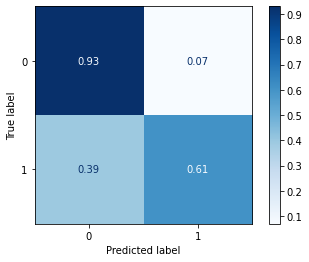

In [174]:
# Display the KNN Model confusion matrix.
ConfusionMatrixDisplay.from_estimator(best_knn, 
                                      X_test_processed, 
                                      y_test, 
                                      cmap='Blues', 
                                      normalize='true');

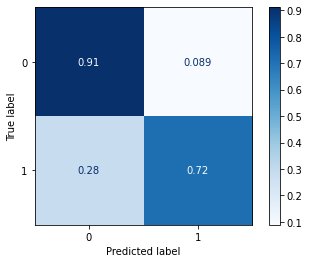

In [175]:
# Display the L1 tuned Logistics Model confusion matrix.
ConfusionMatrixDisplay.from_estimator(best_l1_log_reg_pipe, 
                                      X_test_processed, 
                                      y_test, cmap='Blues', 
                                      normalize='true');

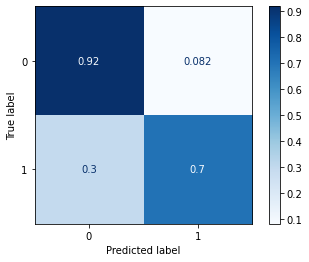

In [176]:
# Display the L2 tuned Logistics Model confusion matrix.
ConfusionMatrixDisplay.from_estimator(best_l2_log_reg_pipe, 
                                      X_test_processed, 
                                      y_test, 
                                      cmap='Blues', 
                                      normalize='true');

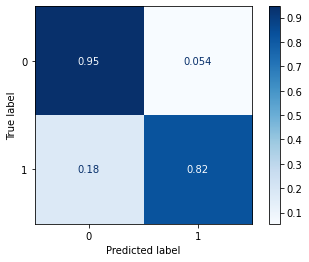

In [177]:
# Display the Random Forest Model confusion matrix.
ConfusionMatrixDisplay.from_estimator(ran_for, 
                                      X_test_processed, 
                                      y_test, 
                                      cmap='Blues', 
                                      normalize='true');

### **Classification Reports**

In [178]:
# Calculate the Classification Reports.
knn_classification_report = classification_report(y_test, knn_test_preds)
best_l1_log_reg_report = classification_report(y_test, log_reg_l1_test_preds)
best_l2_log_reg_report = classification_report(y_test, log_reg_l2_test_preds)
ran_for_classification_report = classification_report(y_test, ran_for_test_preds)
# Display the Classification Reports.
print('\n')
print(f'KNN Model Classification Report \n{knn_classification_report}');
print('\n')
print(f'Random Forest Model Classification Report \n{ran_for_classification_report}');
print('\n')
print(f'L1 Tuned Logistics Classification Report \n{best_l1_log_reg_report}');
print('\n')
print(f'L2 Tuned Logistics Classification Report \n{best_l2_log_reg_report}');



KNN Model Classification Report 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       316
           1       0.82      0.61      0.70       165

    accuracy                           0.82       481
   macro avg       0.82      0.77      0.78       481
weighted avg       0.82      0.82      0.81       481



Random Forest Model Classification Report 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       316
           1       0.89      0.82      0.86       165

    accuracy                           0.90       481
   macro avg       0.90      0.89      0.89       481
weighted avg       0.90      0.90      0.90       481



L1 Tuned Logistics Classification Report 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       316
           1       0.81      0.72      0.76       165

    accuracy                           0.84       481
   m

## **Model Comparison Summary and Conclusion**

In [179]:
# Initialize data in a dictionary series
model_summary_index = ['KNN',
                       'Logistics Regression L1 tuned', 
                               'Logistics Regression L2 tuned', 
                               'Random Forest']
d = {'Accuracy Score Train' : pd.Series([knn_train_accuracy,
                                         log_reg_l1_train_accuracy, 
                                         log_reg_l2_train_accuracy, 
                                         ran_for_train_accuracy,],
                       index = model_summary_index),
     'Accuracy Score Test' : pd.Series([knn_test_accuracy,
                                        log_reg_l1_test_accuracy, 
                                        log_reg_l2_test_accuracy, 
                                        ran_for_test_accuracy],
                       index = model_summary_index),
     'Recall Score Train' : pd.Series([knn_train_recall,
                                       log_reg_l1_train_recall, 
                                       log_reg_l2_train_recall, 
                                       ran_for_train_recall,],
                       index = model_summary_index),
     'Recall Score Test' : pd.Series([knn_test_recall,
                                      log_reg_l1_test_recall, 
                                      log_reg_l2_test_recall, 
                                      ran_for_test_recall],
                       index = model_summary_index),
     'Precision Score Train' : pd.Series([knn_train_precision,
                                          log_reg_l1_train_precision, 
                                          log_reg_l2_train_precision, 
                                          ran_for_train_precision],
                       index = model_summary_index),
     'Precision Score Test' : pd.Series([knn_test_precision,
                                         log_reg_l1_test_precision, 
                                         log_reg_l2_test_precision, 
                                         ran_for_test_precision,],
                       index = model_summary_index),
     'AUC Score Train' : pd.Series([knn_train_auc,
                                    log_reg_l1_train_auc, 
                                    log_reg_l2_train_auc, 
                                    ran_for_train_auc],
                       index = model_summary_index),
     'AUC Score Test' : pd.Series([knn_test_auc,
                                   log_reg_l1_test_auc, 
                                   log_reg_l2_test_auc, 
                                   ran_for_test_auc],
                       index = model_summary_index),
     'F1 Macro Average' : pd.Series([.77,.81, .81, .87],
                       index = model_summary_index),
     'F1 Weighted Average' : pd.Series([.80, .83, .83, .88],
                       index = model_summary_index)}    

In [180]:
# Create a dataframe
model_summary_df = pd.DataFrame(d)

In [181]:
model_summary_df = model_summary_df.round(4)

In [182]:
# Display the dataframe
model_summary_df

,Accuracy Score Train,Accuracy Score Test,Recall Score Train,Recall Score Test,Precision Score Train,Precision Score Test,AUC Score Train,AUC Score Test,F1 Macro Average,F1 Weighted Average
KNN,0.8484,0.8191,0.6956,0.6061,0.8339,0.8197,0.9270,0.9008,0.77,0.80
Logistics Regression L1 tuned,0.8448,0.8441,0.7154,0.7152,0.8090,0.8082,0.9154,0.9082,0.81,0.83
Logistics Regression L2 tuned,0.8375,0.8441,0.6865,0.7030,0.8097,0.8169,0.9121,0.9053,0.81,0.83
Random Forest,1.0000,0.9044,1.0000,0.8242,1.0000,0.8889,1.0000,0.9622,0.87,0.88


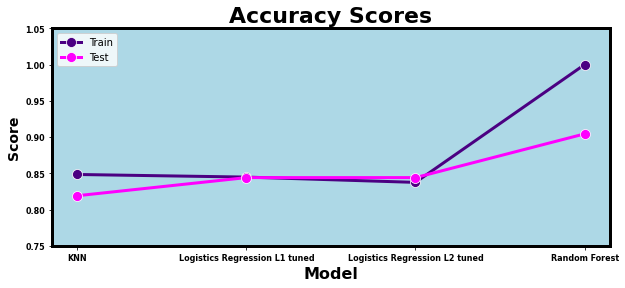

In [183]:
# Display line plot of scores
fig, ax = plt.subplots(nrows=1, figsize=(10,4), facecolor='w')
ax.set_facecolor('lightblue')
plt.title('Accuracy Scores', fontsize = 22, weight='bold')
sns.lineplot(data=model_summary_df['Accuracy Score Train'], color="indigo", linewidth=3, markersize=10, marker='o', label='Train');
sns.lineplot(data=model_summary_df['Accuracy Score Test'], color="magenta", linewidth=3, markersize=10, marker='o', label='Test');
plt.xlabel('Model', fontsize = 16, weight='bold')
plt.xticks(weight='bold')
ax.set_ylabel('Score', fontweight='bold', fontsize=14)
ax.set_ylim(.75, 1.05)
ax.tick_params(labelcolor='k', labelsize=8)
ax.set_yticklabels(ax.get_yticks(), weight='bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3);
format = StrMethodFormatter('{x:.2f}') 
ax.yaxis.set_major_formatter(format);

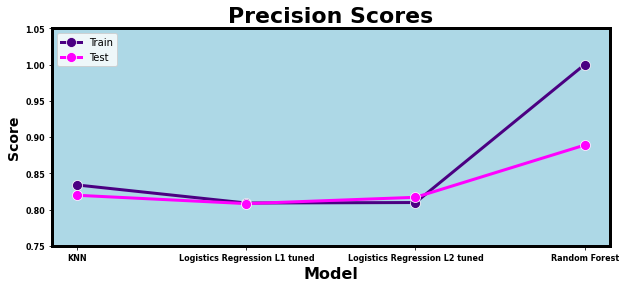

In [184]:
# Display line plot of scores
fig, ax = plt.subplots(nrows=1, figsize=(10,4), facecolor='w')
ax.set_facecolor('lightblue')
plt.title('Precision Scores', fontsize = 22, weight='bold')
sns.lineplot(data=model_summary_df['Precision Score Train'], color="indigo", linewidth=3, markersize=10, marker='o', label='Train');
sns.lineplot(data=model_summary_df['Precision Score Test'], color="magenta", linewidth=3, markersize=10, marker='o', label='Test');
plt.xlabel('Model', fontsize = 16, weight='bold')
plt.xticks(weight='bold')
ax.set_ylabel('Score', fontweight='bold', fontsize=14)
ax.set_ylim(.75, 1.05)
ax.tick_params(labelcolor='k', labelsize=8)
ax.set_yticklabels(ax.get_yticks(), weight='bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3);
format = StrMethodFormatter('{x:.2f}') 
ax.yaxis.set_major_formatter(format);

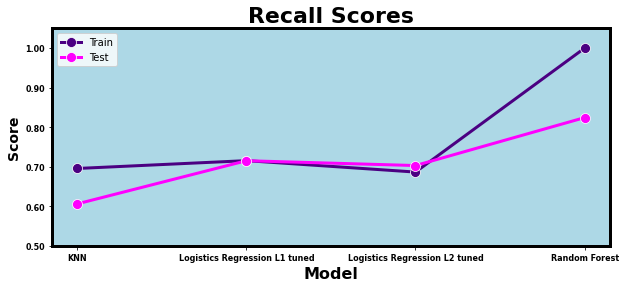

In [185]:
# Display line plot of scores
fig, ax = plt.subplots(nrows=1, figsize=(10,4), facecolor='w')
ax.set_facecolor('lightblue')
plt.title('Recall Scores', fontsize = 22, weight='bold')
sns.lineplot(data=model_summary_df['Recall Score Train'], color="indigo", linewidth=3, markersize=10, marker='o', label='Train');
sns.lineplot(data=model_summary_df['Recall Score Test'], color="magenta", linewidth=3, markersize=10, marker='o', label='Test');
plt.xlabel('Model', fontsize = 16, weight='bold')
plt.xticks(weight='bold')
ax.set_ylabel('Score', fontweight='bold', fontsize=14)
ax.set_ylim(.5, 1.05)
ax.tick_params(labelcolor='k', labelsize=8)
ax.set_yticklabels(ax.get_yticks(), weight='bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3);
format = StrMethodFormatter('{x:.2f}') 
ax.yaxis.set_major_formatter(format);

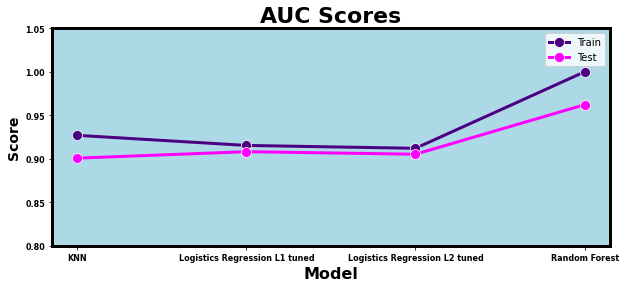

In [186]:
# Display line plot of scores
fig, ax = plt.subplots(nrows=1, figsize=(10,4), facecolor='w')
ax.set_facecolor('lightblue')
plt.title('AUC Scores', fontsize = 22, weight='bold')
sns.lineplot(data=model_summary_df['AUC Score Train'], color="indigo", linewidth=3, markersize=10, marker='o', label='Train');
sns.lineplot(data=model_summary_df['AUC Score Test'], color="magenta", linewidth=3, markersize=10, marker='o', label='Test');
plt.xlabel('Model', fontsize = 16, weight='bold')
plt.xticks(weight='bold')
ax.set_ylabel('Score', fontweight='bold', fontsize=14)
ax.set_ylim(.80, 1.05)
ax.tick_params(labelcolor='k', labelsize=8)
ax.set_yticklabels(ax.get_yticks(), weight='bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3);
format = StrMethodFormatter('{x:.2f}') 
ax.yaxis.set_major_formatter(format)     

### **Model Recommendation**

**The Random Forest Model** is reccomended due to having the highest Accuracy, Recall, and Precision Scores, as well as the highest F1 Macro and F1 Weighted Averages.

Accurate prediction can lead to early diagnosis and treatment. Inaccurate prediction can delay diagnosis and treatment.

### **Benefit of Early Diagnosis and Treatment**

"The main goals of treating metabolic syndrome are to lower your risk of heart disease and to prevent type 2 diabetes if it hasn’t already developed. If you already have type 2 diabetes, treatment can lower your risk of heart disease by controlling all your risk factors.

Heart-healthy lifestyle changes are the first line of treatment for metabolic syndrome. You may have to see a dietitian and a physical therapist to help find a diet and exercise plan that works for you. If healthy lifestyle changes do not work, you may need medicines or weight loss surgery."
- Source - [The Mayo Clinic](https://www.nhlbi.nih.gov/health/metabolic-syndrome/treatment)



---



---

